# Regression drill

This is a simple regression drill. Try to write the minimal code to finish the pipeline.

1. Load and store the data from the existing `diabetes` dataset from `scikit-learn`.

In [34]:
from sklearn.datasets import load_diabetes
import pandas as pd

diabetes = load_diabetes()
data = diabetes.data
target = diabetes.target
df = pd.DataFrame(data, columns=diabetes.feature_names)
df['target'] = target

2. Explore your data by viewing and calculating some basic statistical details like percentiles and mean. Use the pandas library!

In [35]:
import numpy as np

#print(df.head())

for i in df.columns:
    print("=====================")
    print(f"{i}")
    print(f"Moyenne : {df[i].mean()}")
    print(f"Medianne : {df[i].median()}")
    print(f"Percentile (50): {np.percentile(df[i], 50)}")
    print("=====================")
    print()
    

age
Moyenne : -2.511816797794472e-19
Medianne : 0.005383060374248237
Percentile (50): 0.005383060374248237

sex
Moyenne : 1.2307902309192911e-17
Medianne : -0.044641636506989144
Percentile (50): -0.044641636506989144

bmi
Moyenne : -2.2455642172282577e-16
Medianne : -0.007283766209687899
Percentile (50): -0.007283766209687899

bp
Moyenne : -4.7975700837874414e-17
Medianne : -0.00567042229275739
Percentile (50): -0.00567042229275739

s1
Moyenne : -1.3814992387869595e-17
Medianne : -0.004320865536613489
Percentile (50): -0.004320865536613489

s2
Moyenne : 3.918434204559376e-17
Medianne : -0.0038190651205350003
Percentile (50): -0.0038190651205350003

s3
Moyenne : -5.7771786349272854e-18
Medianne : -0.006584467611155497
Percentile (50): -0.006584467611155497

s4
Moyenne : -9.042540472060099e-18
Medianne : -0.002592261998183278
Percentile (50): -0.002592261998183278

s5
Moyenne : 9.293722151839546e-17
Medianne : -0.0019471710869220743
Percentile (50): -0.0019471710869220743

s6
Moyenne : 1

3. Create some scatter plots or any other kind of plots that help you understand the data.

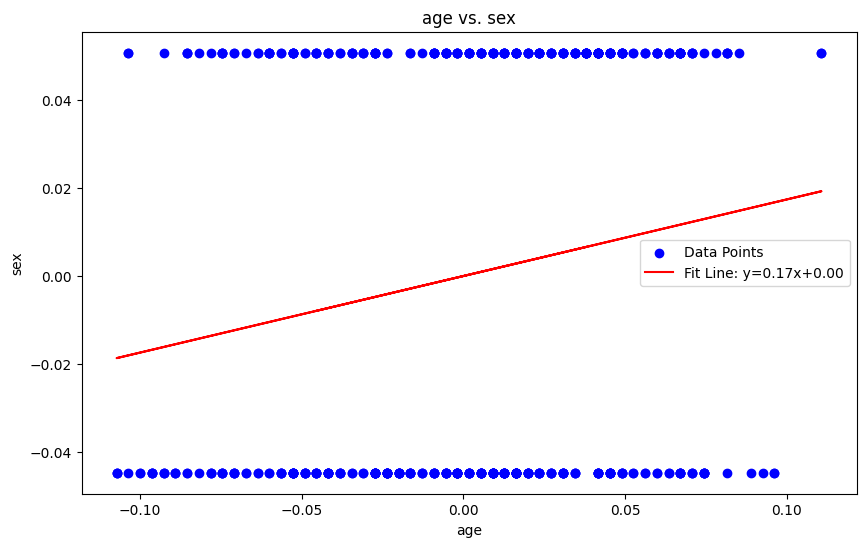

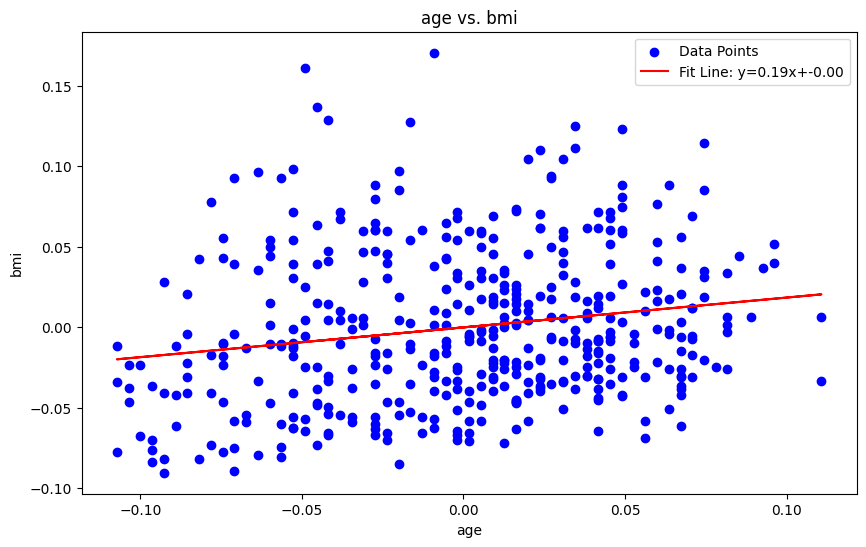

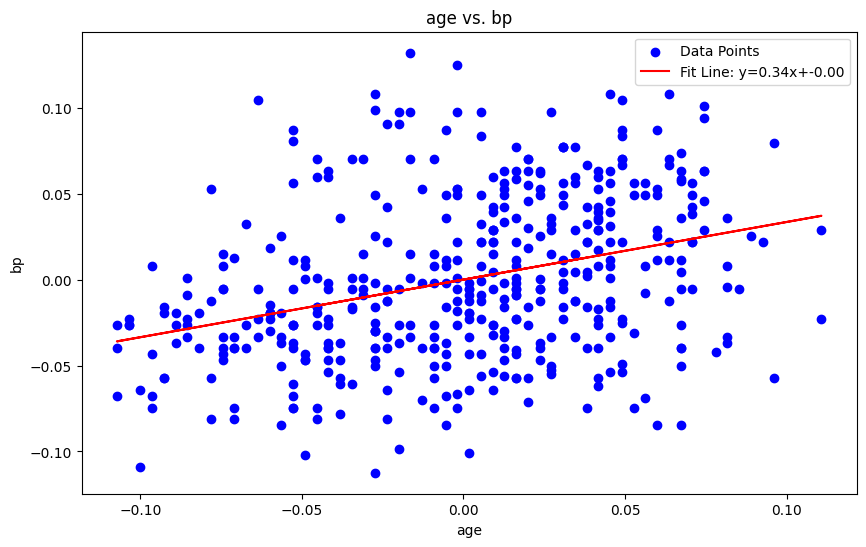

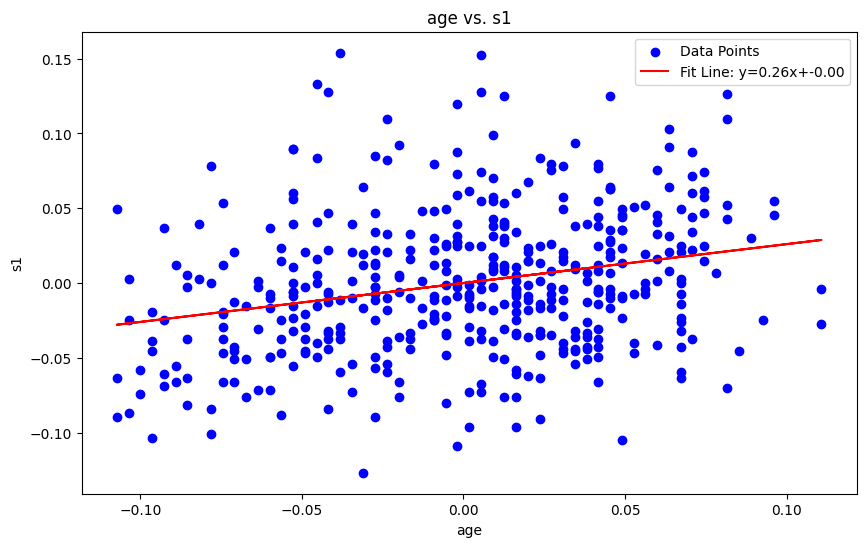

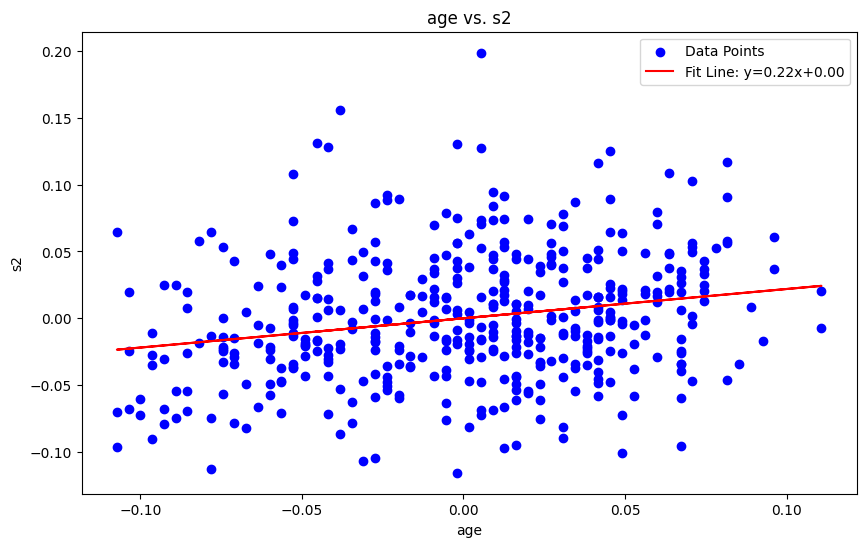

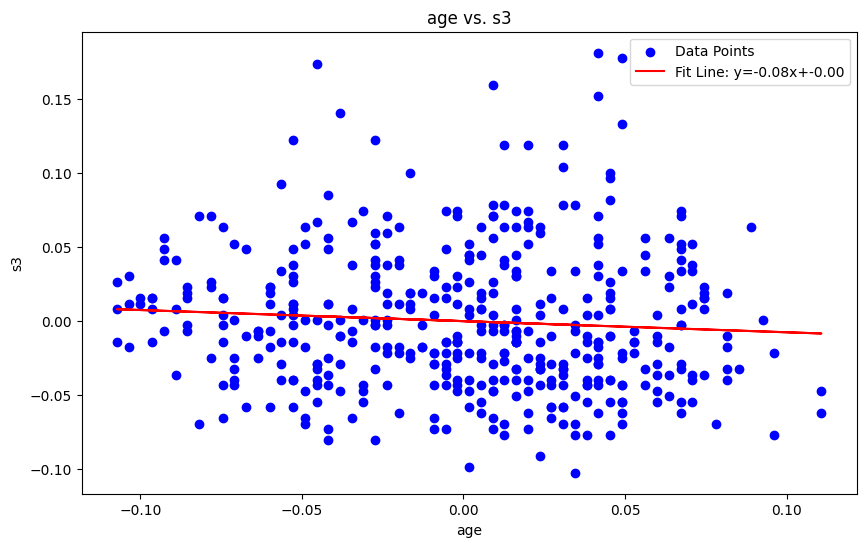

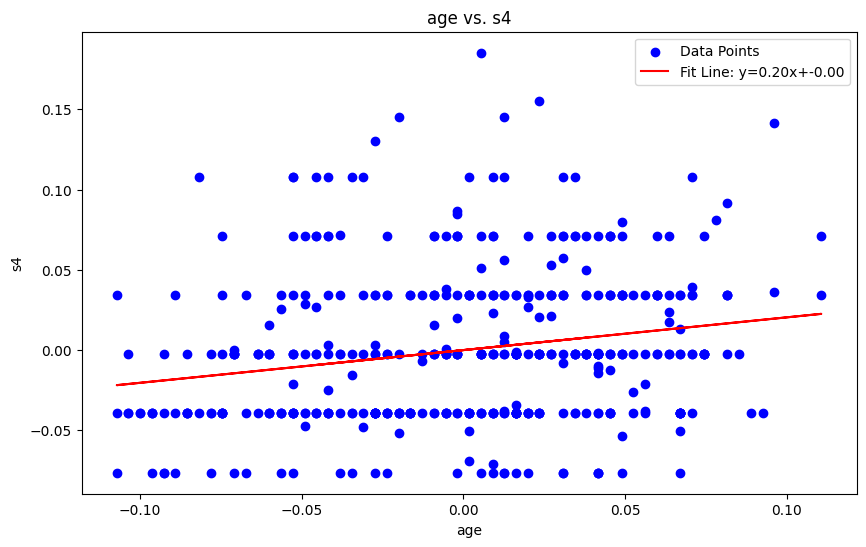

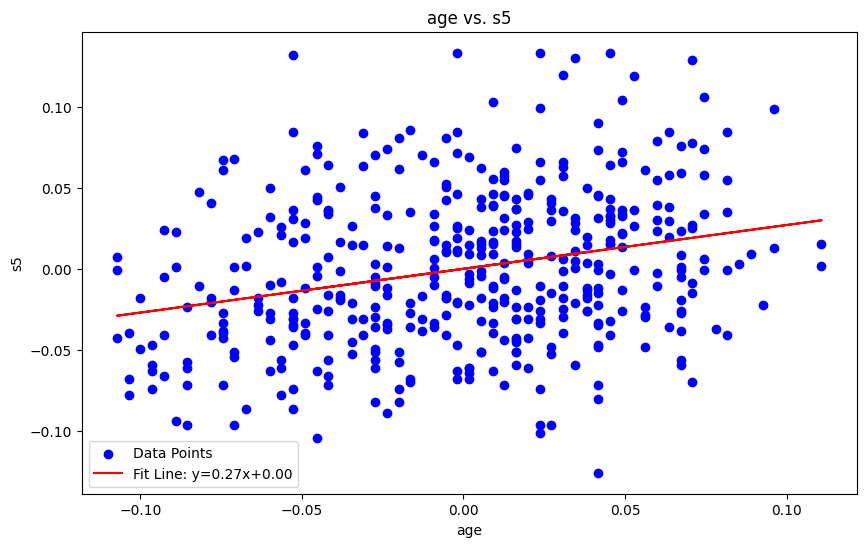

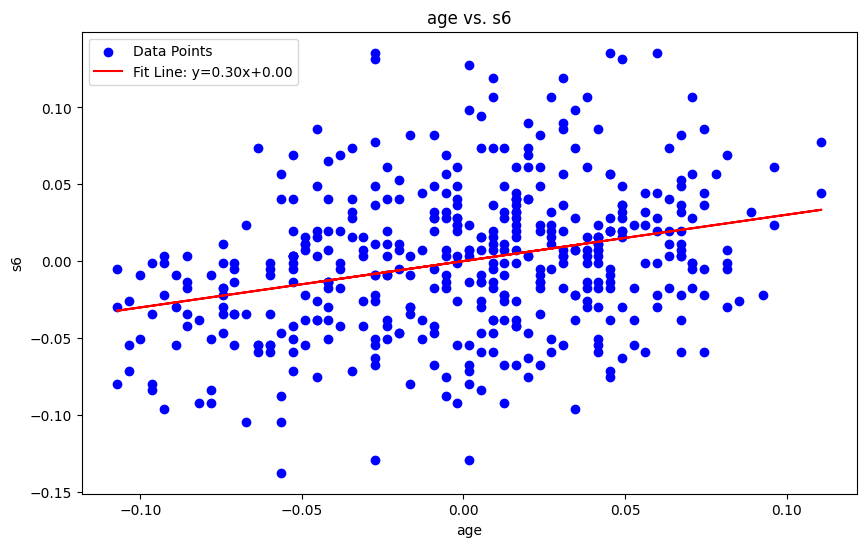

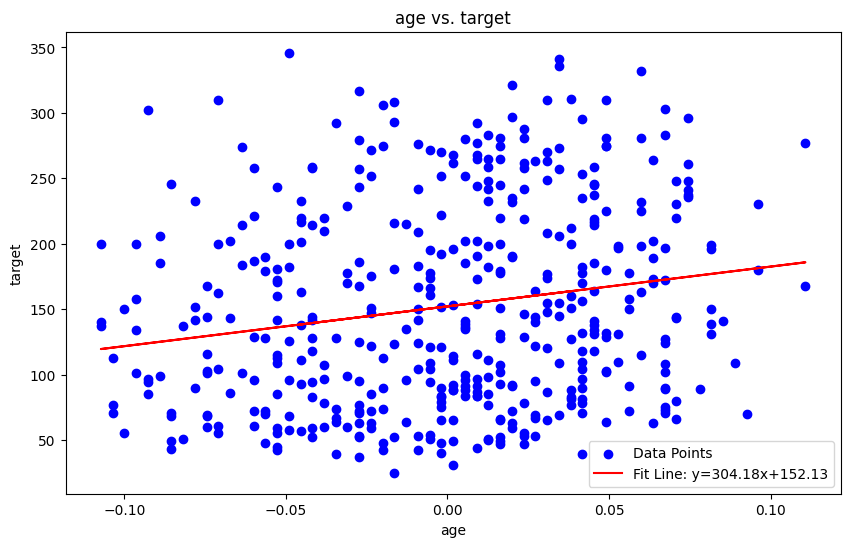

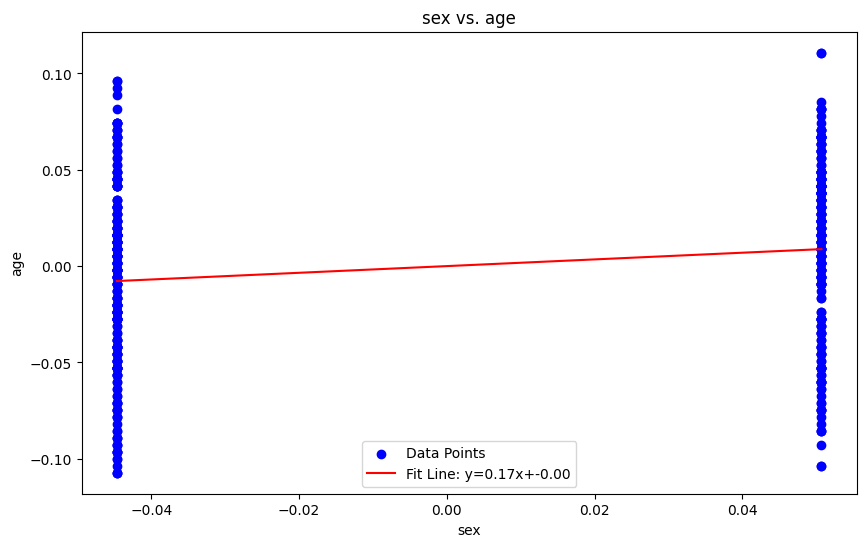

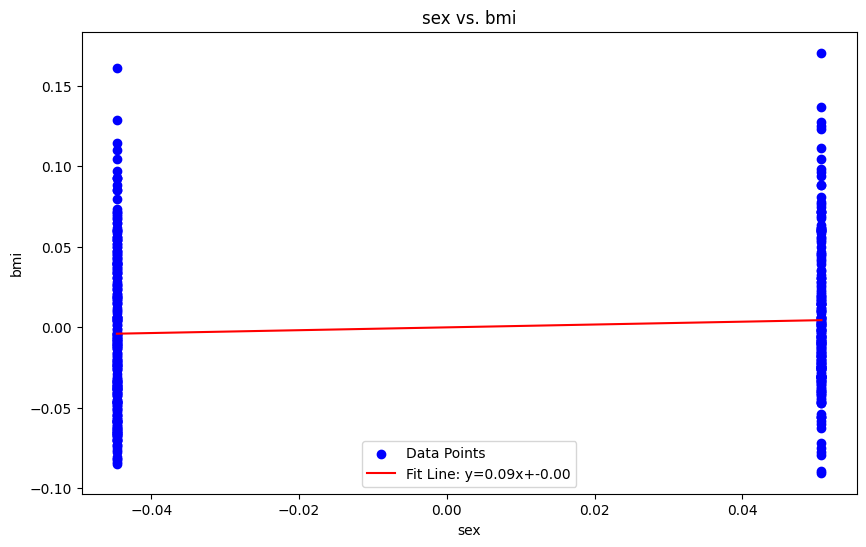

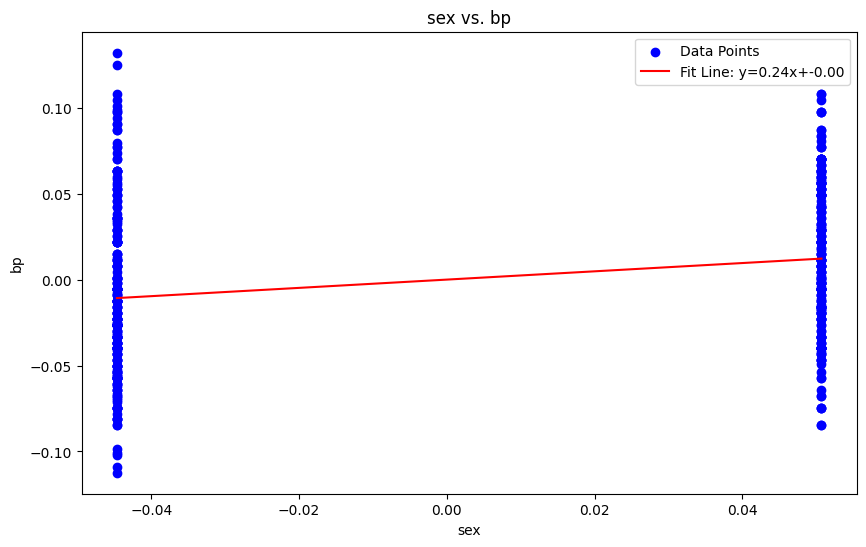

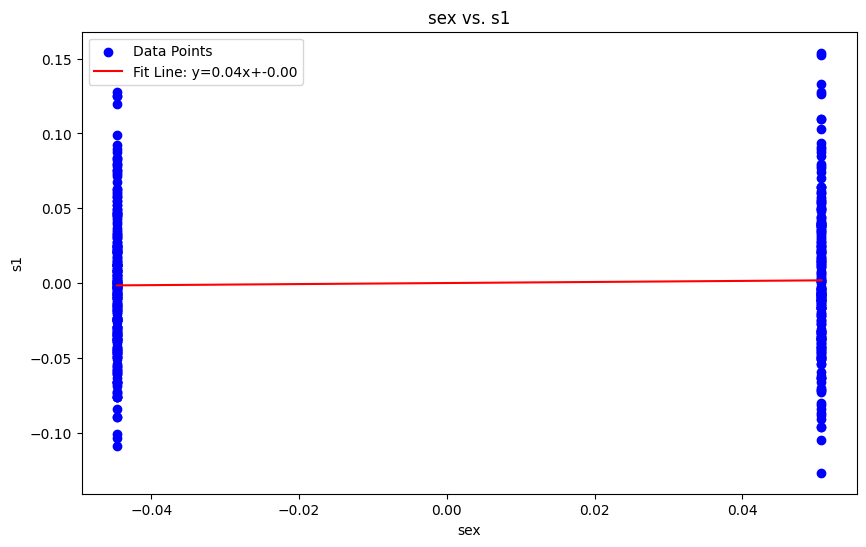

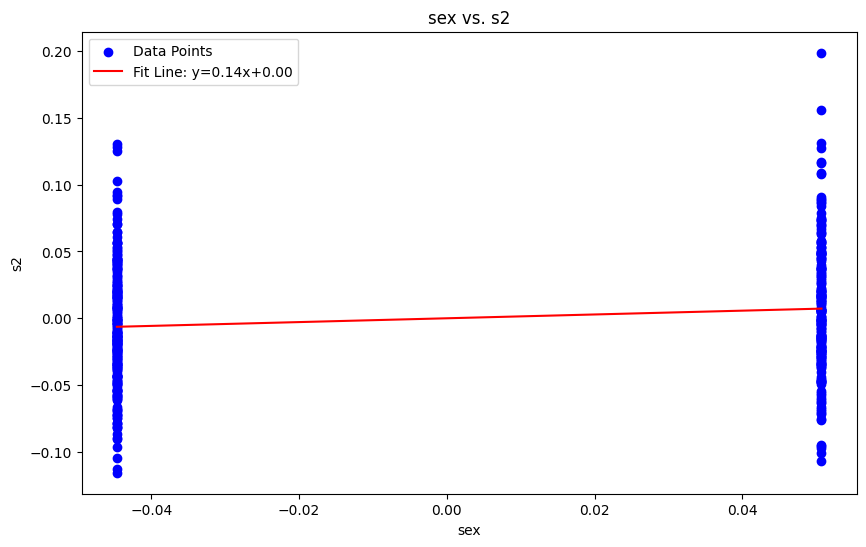

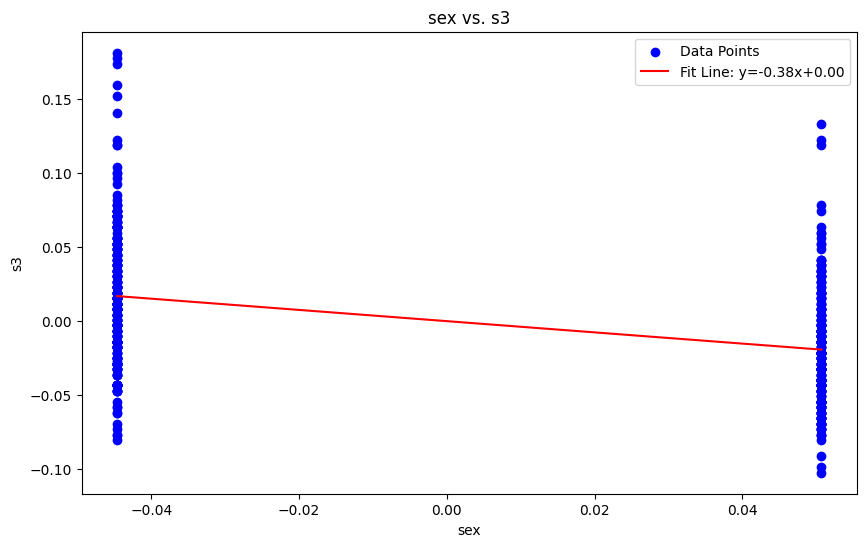

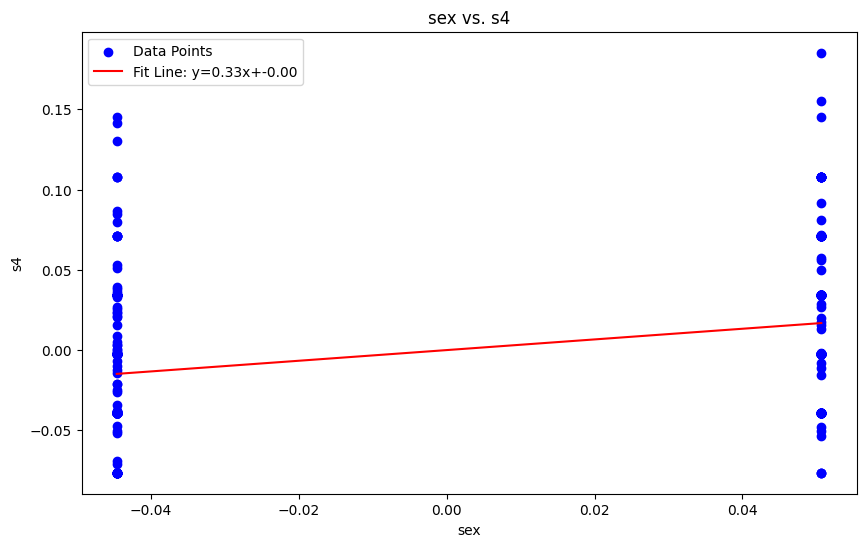

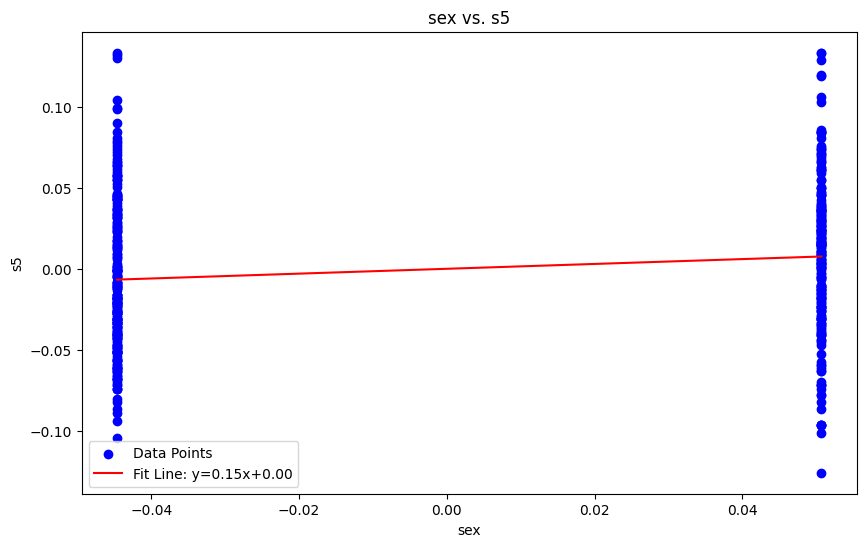

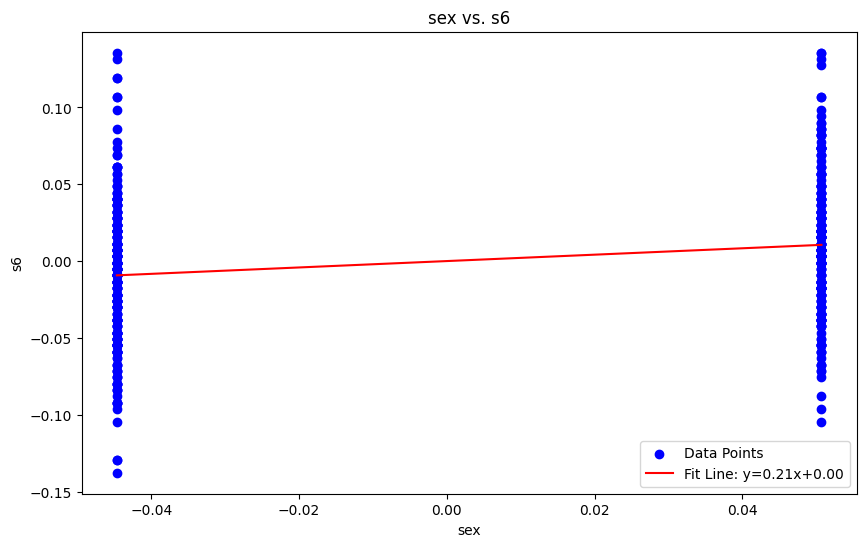

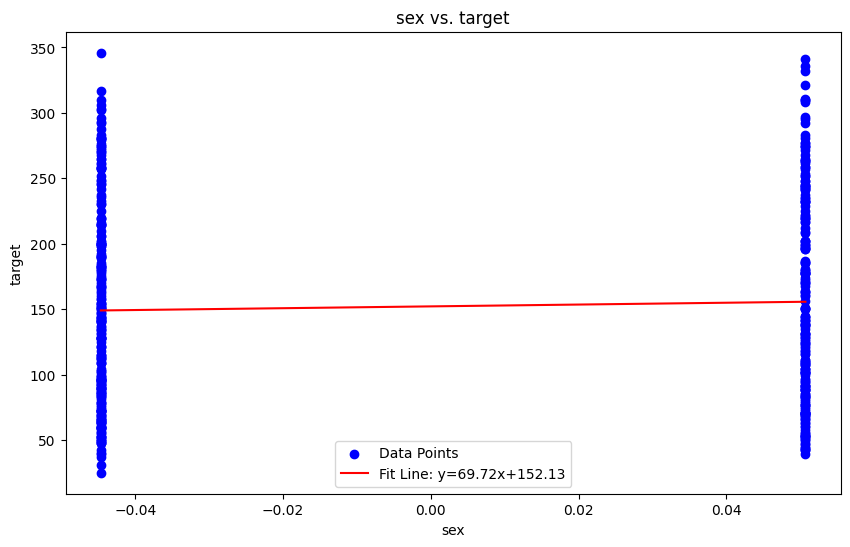

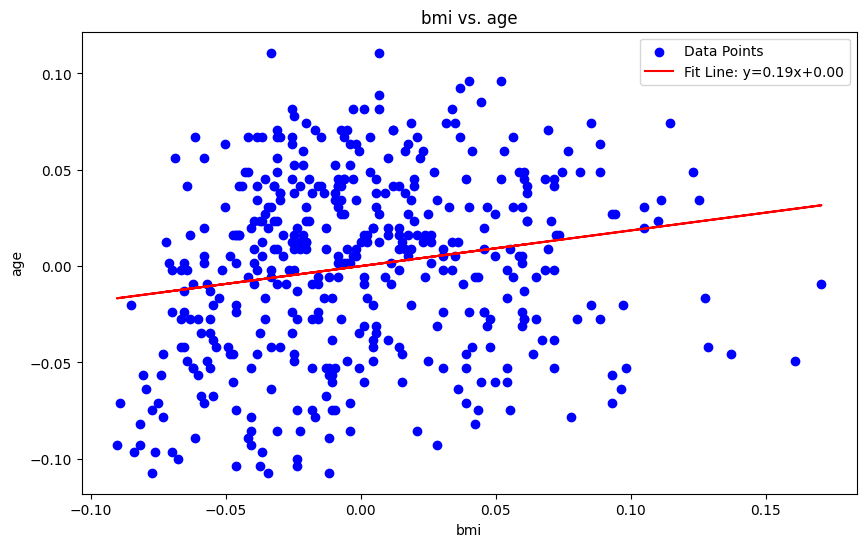

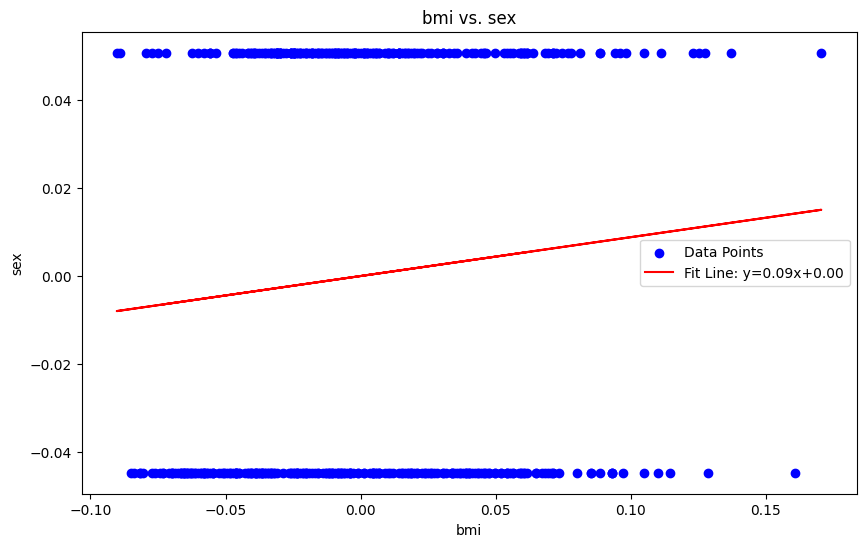

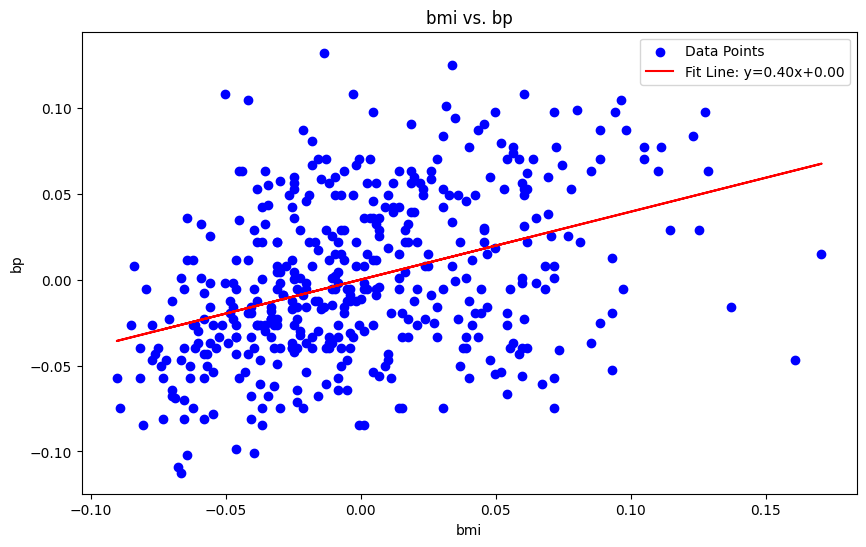

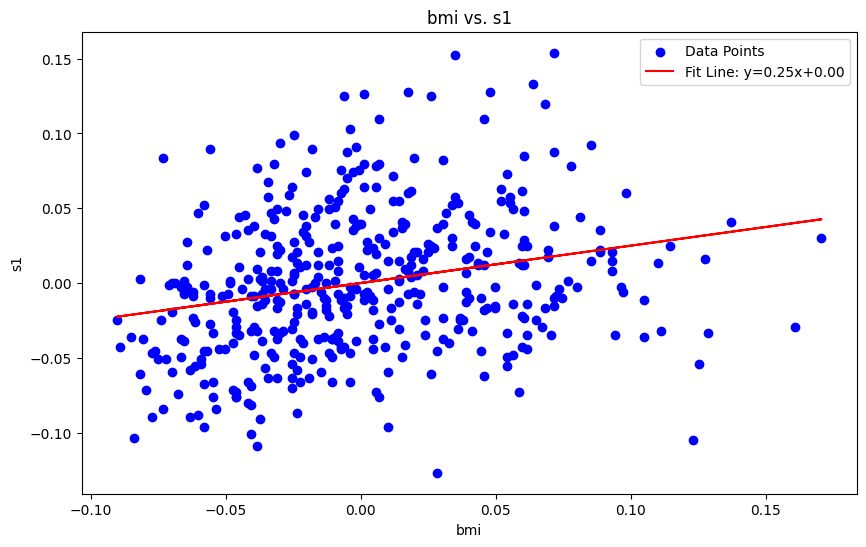

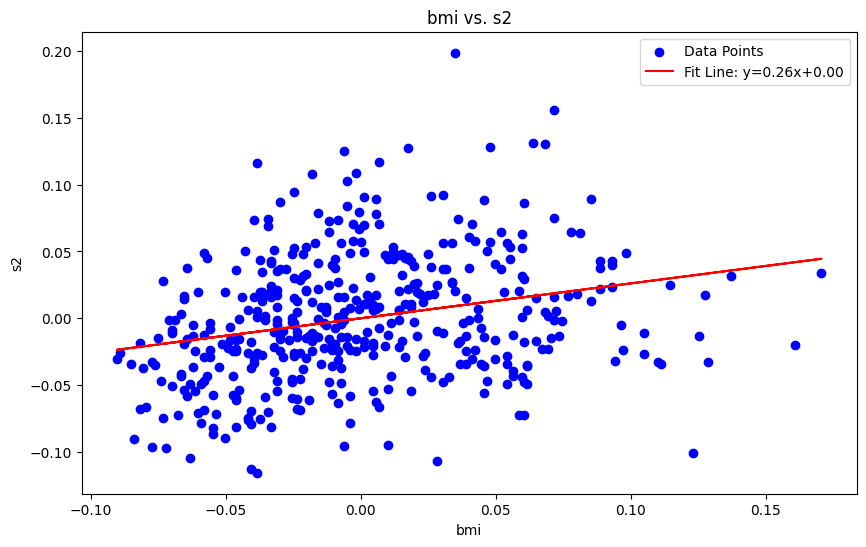

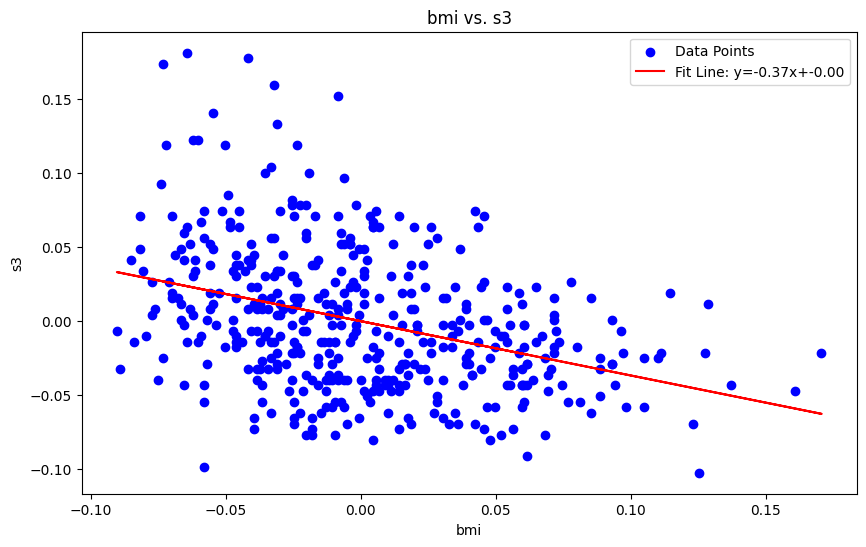

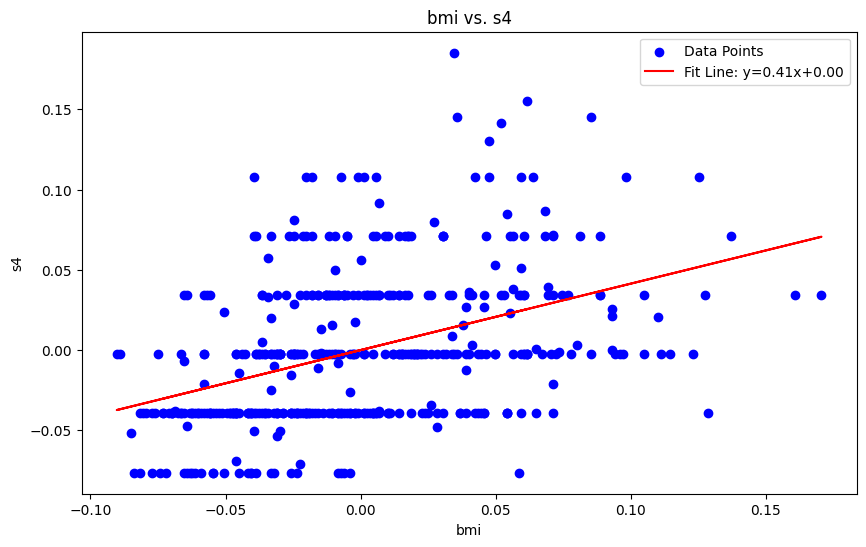

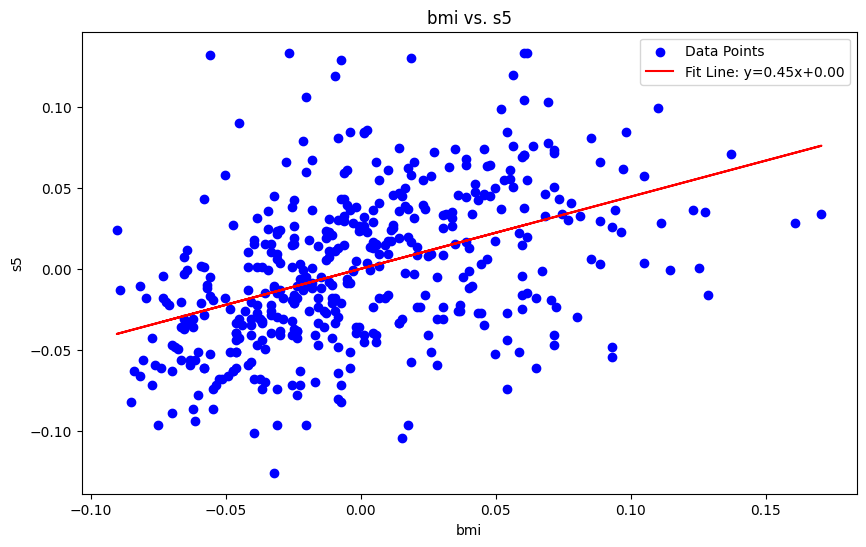

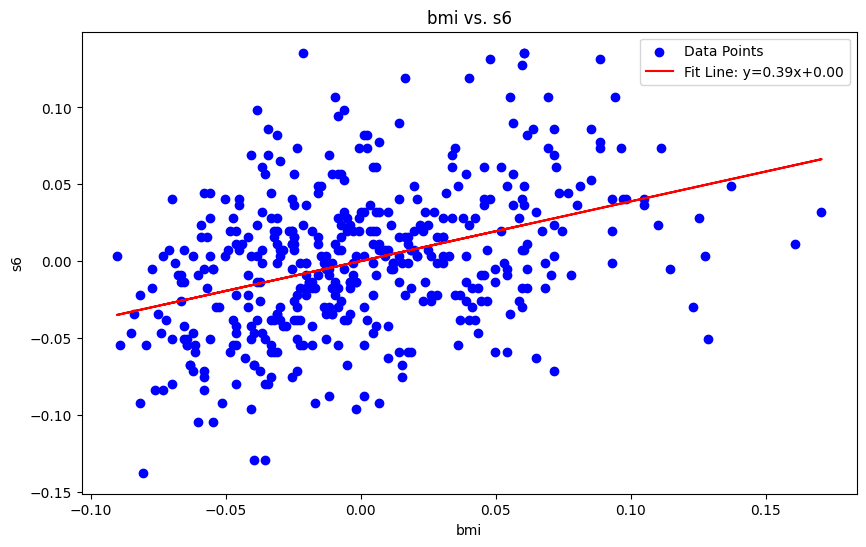

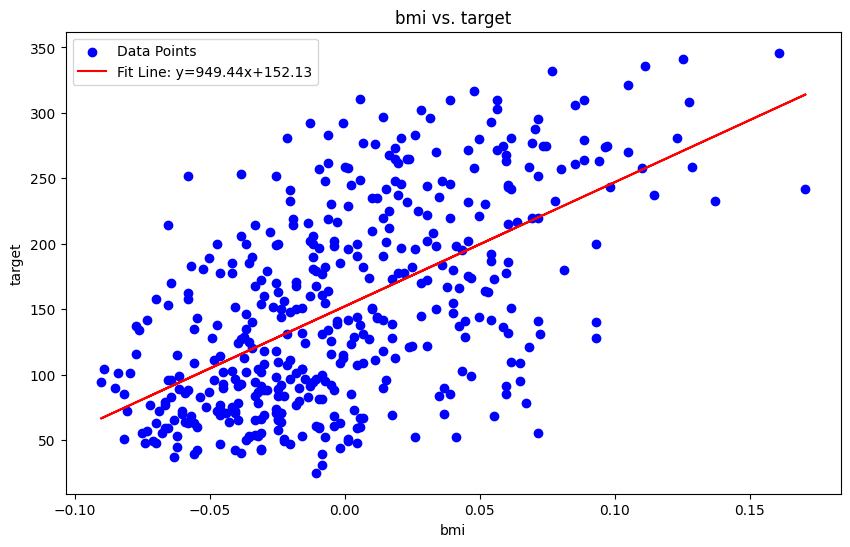

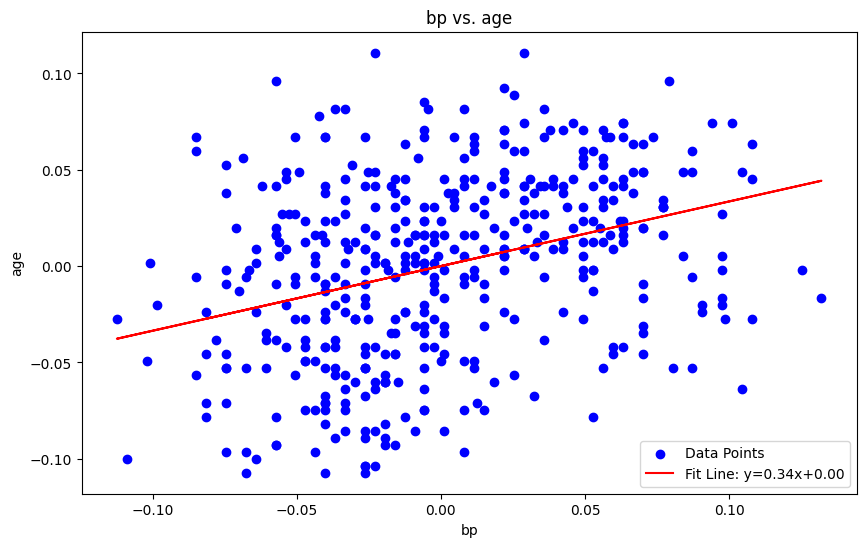

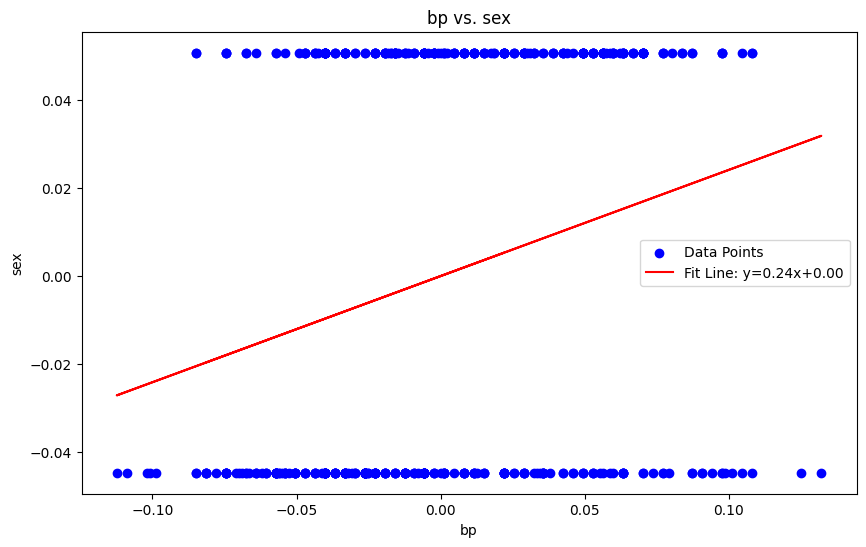

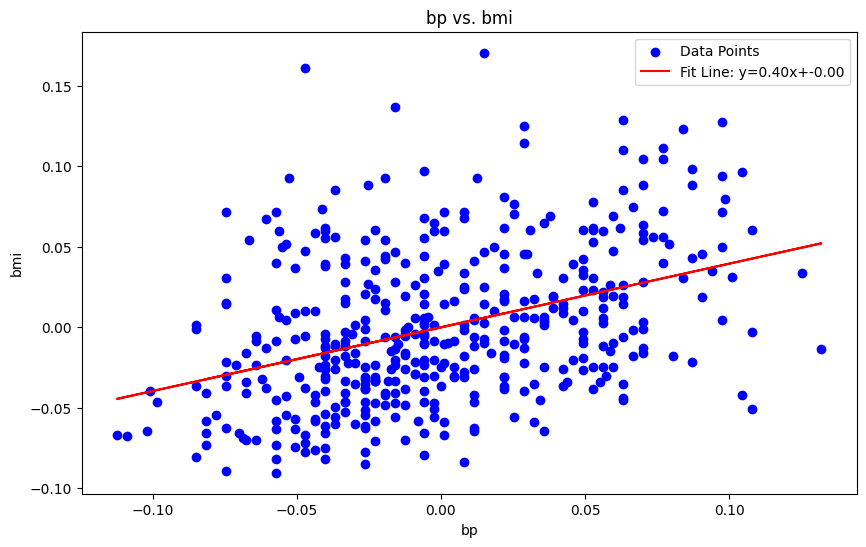

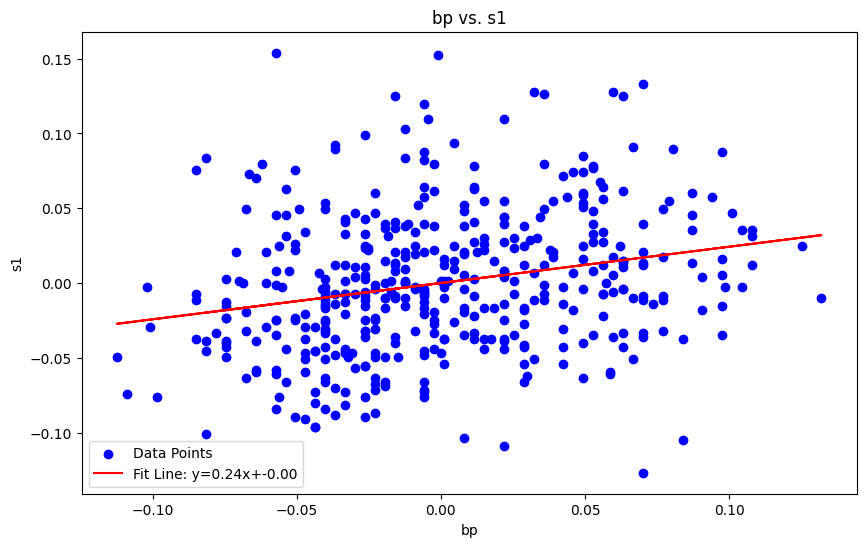

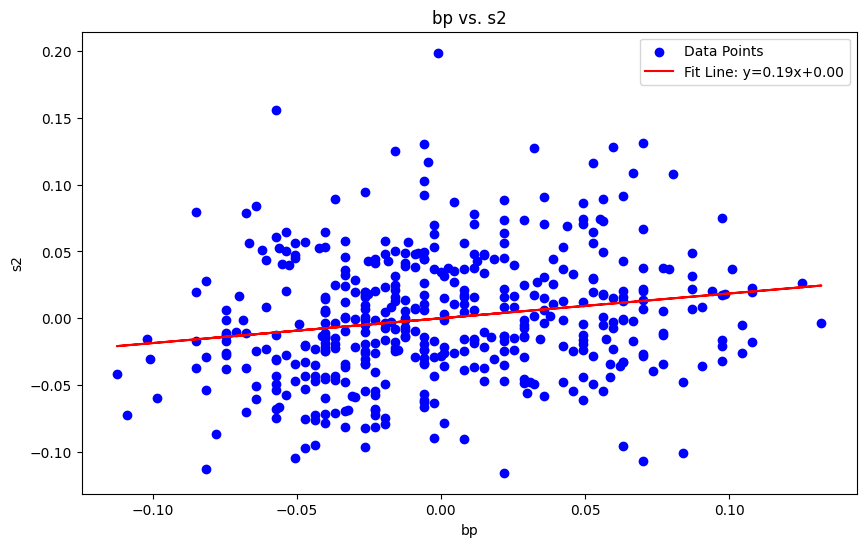

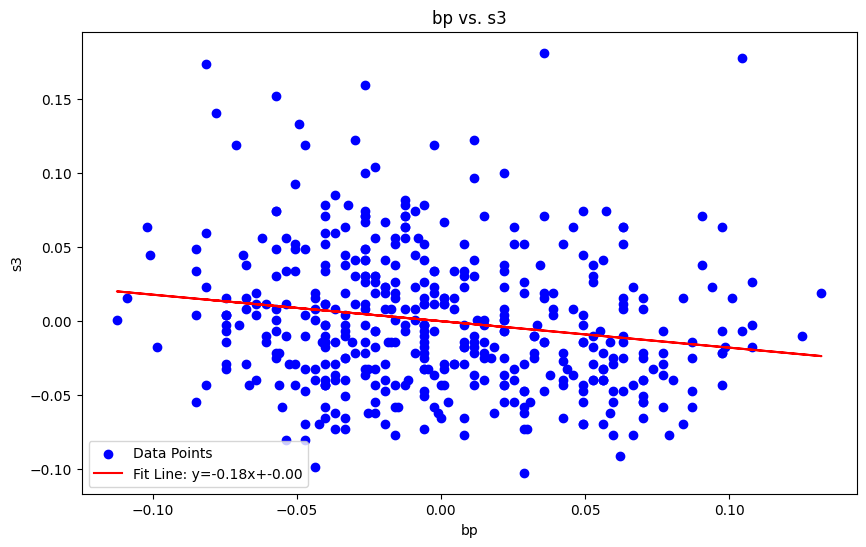

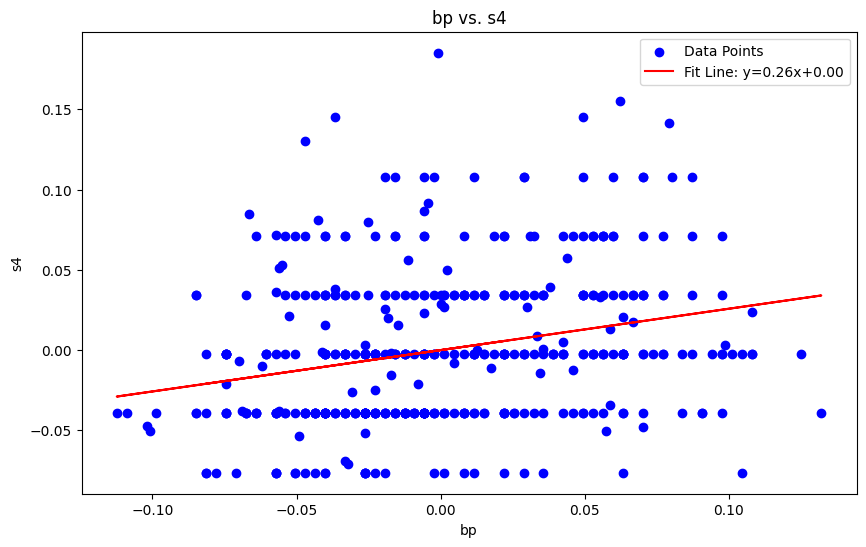

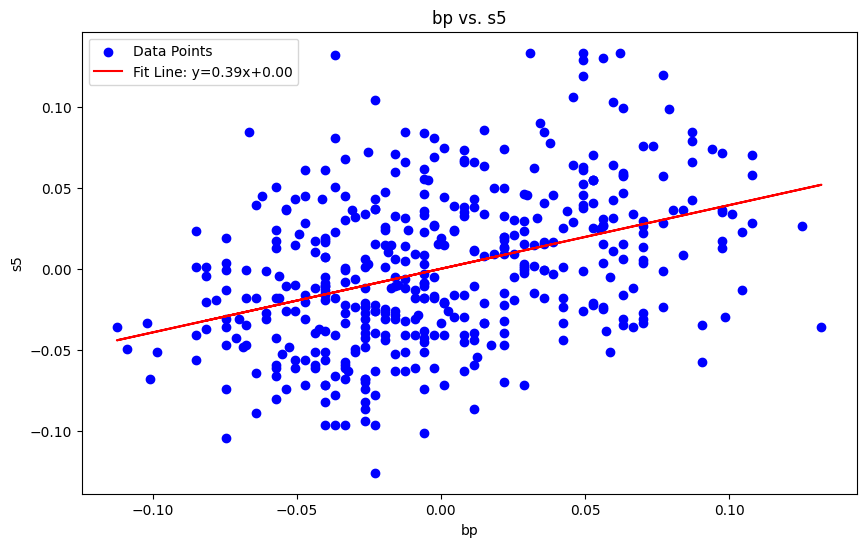

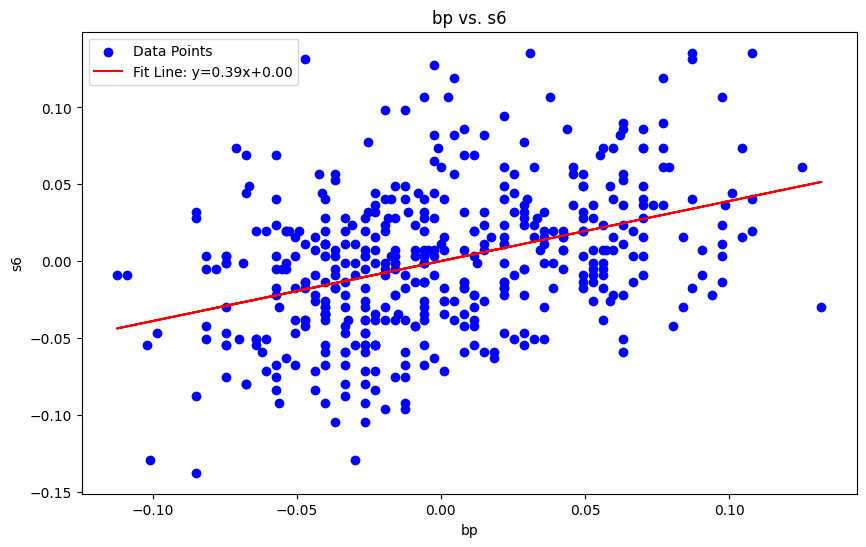

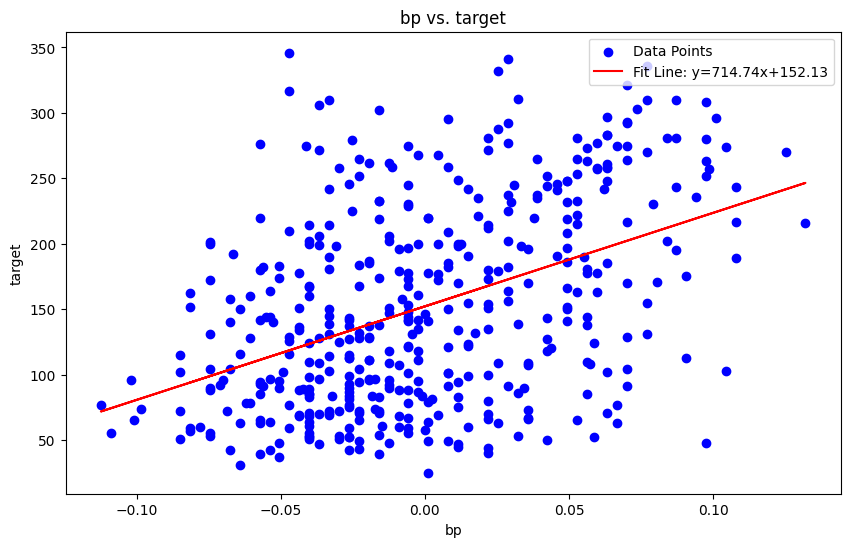

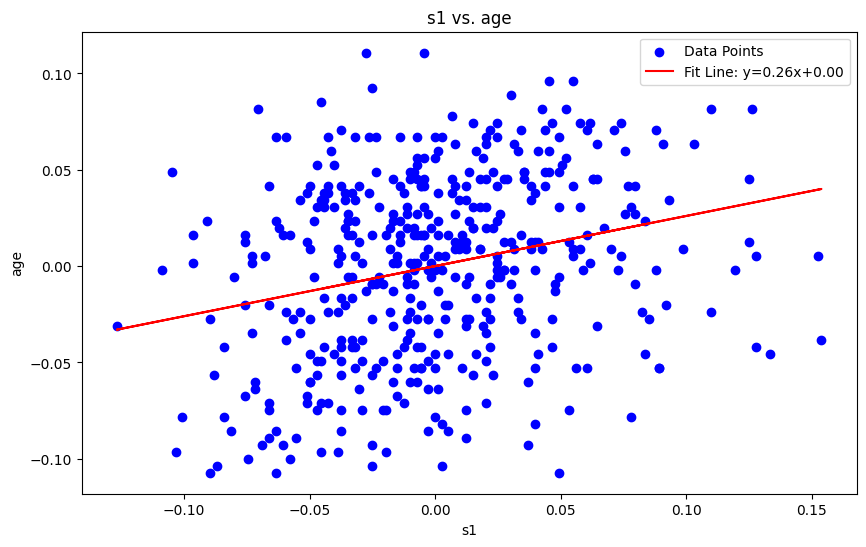

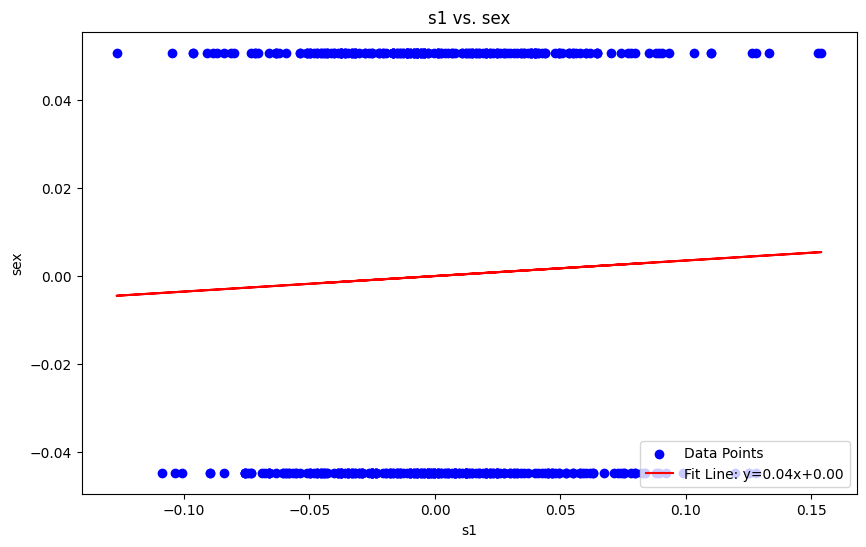

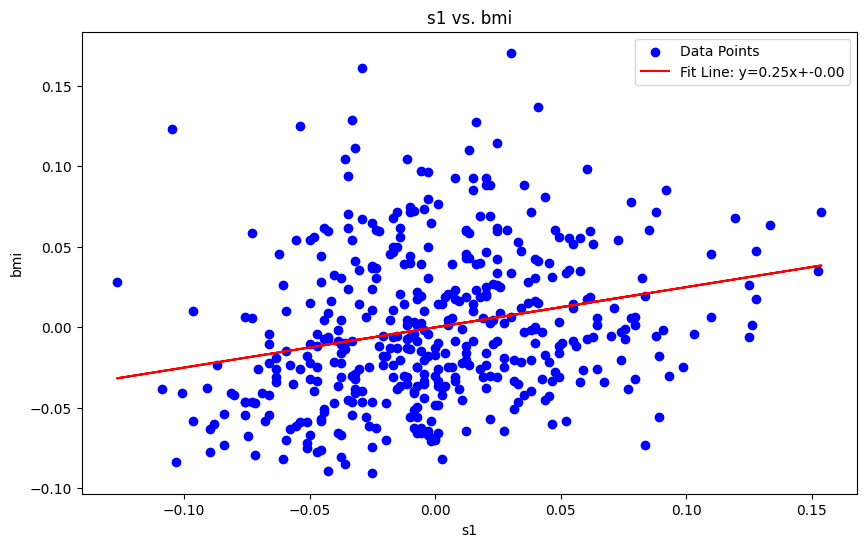

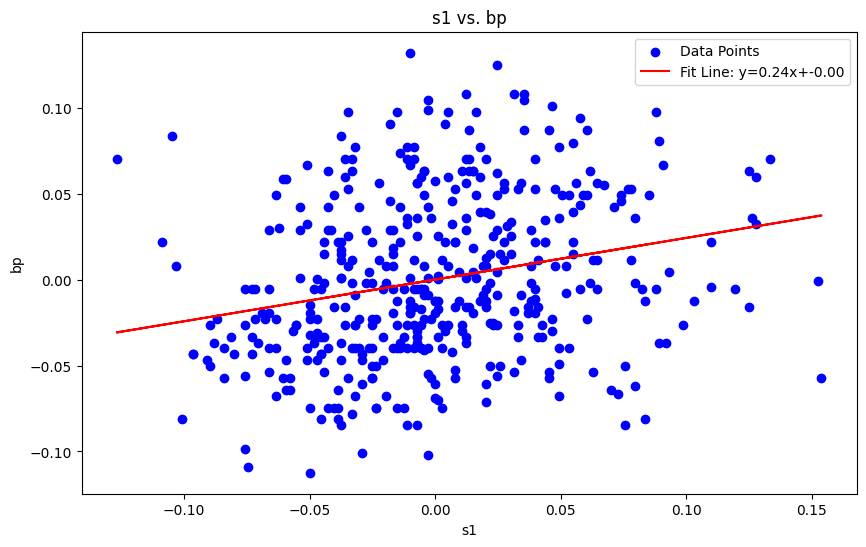

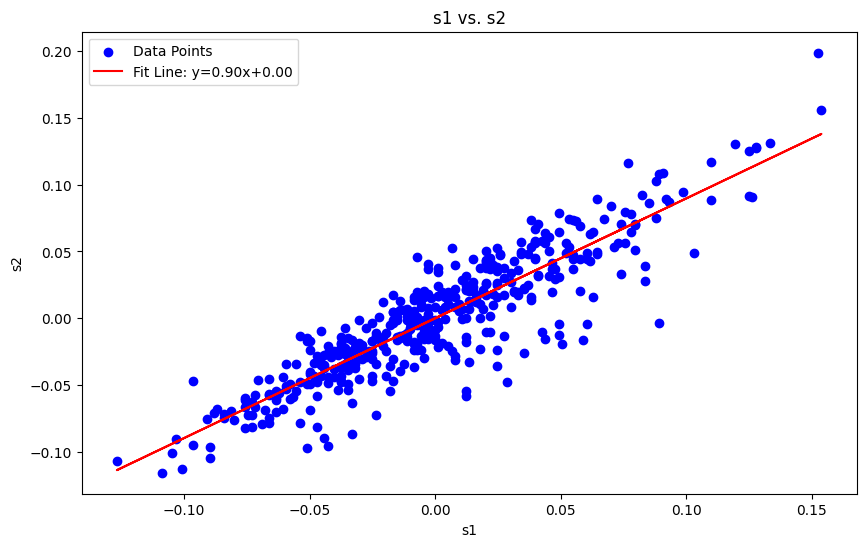

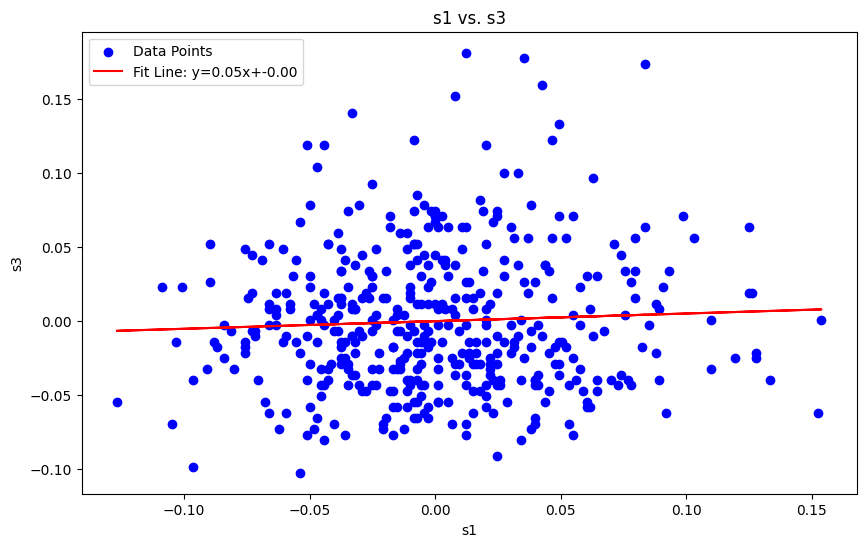

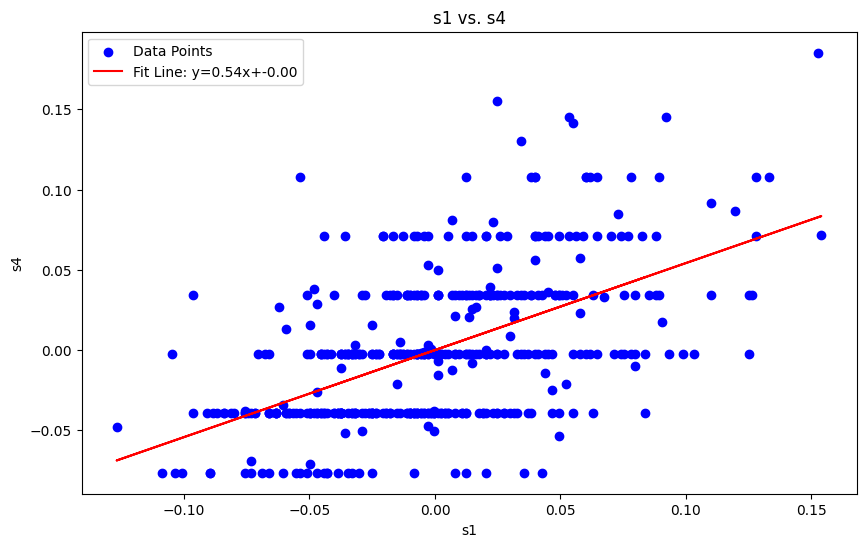

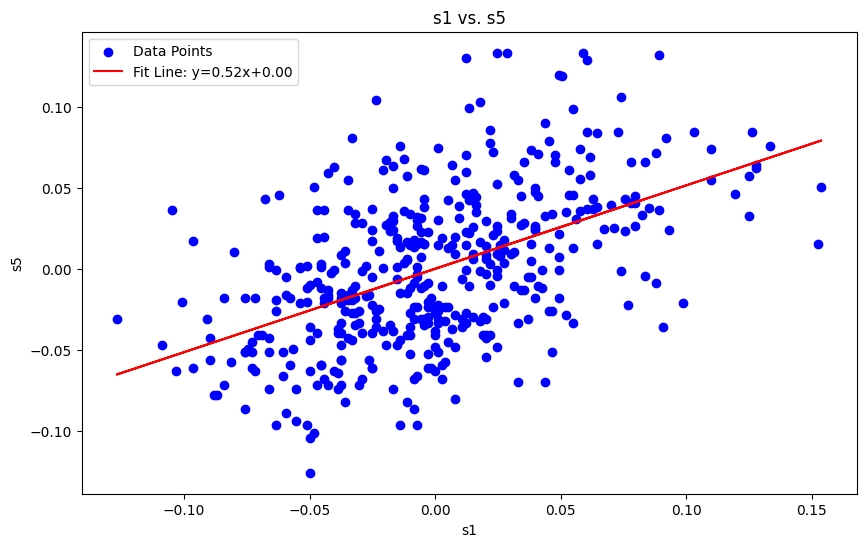

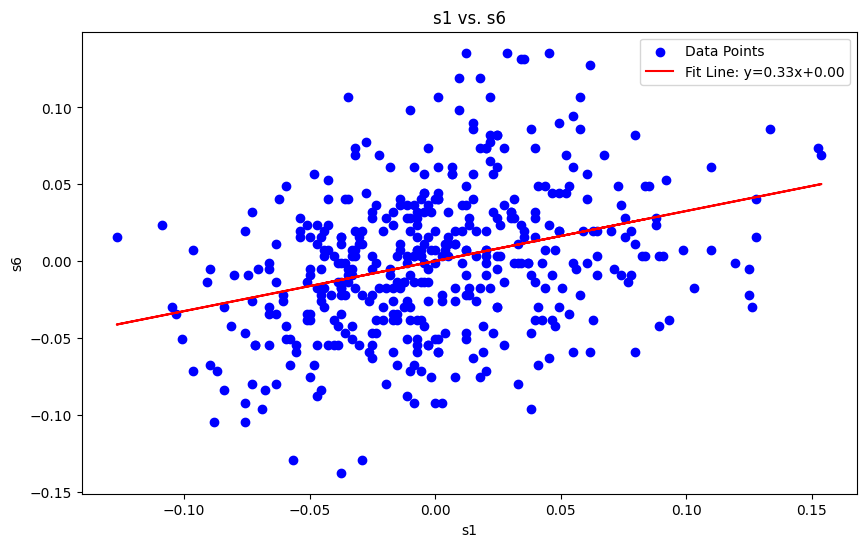

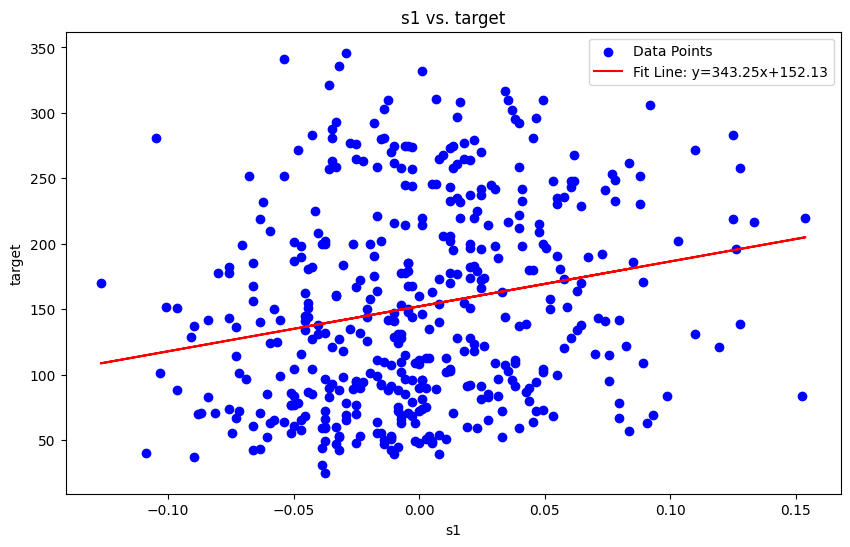

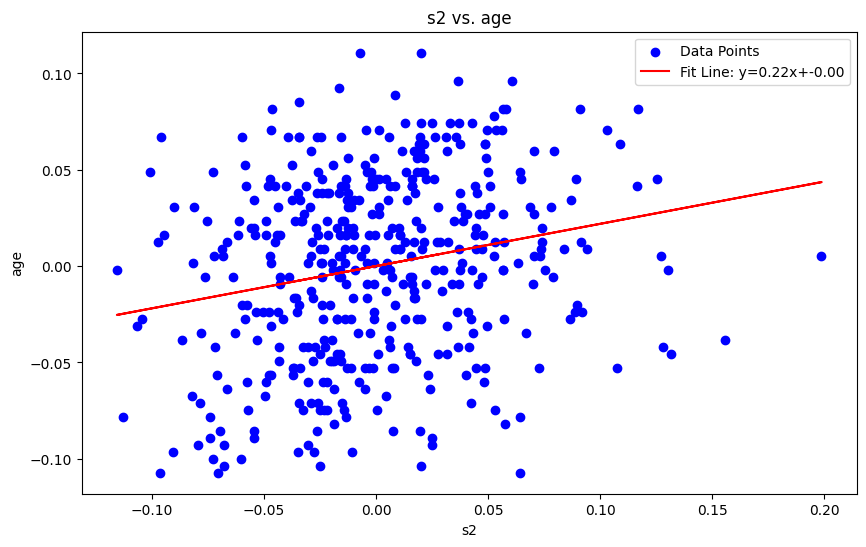

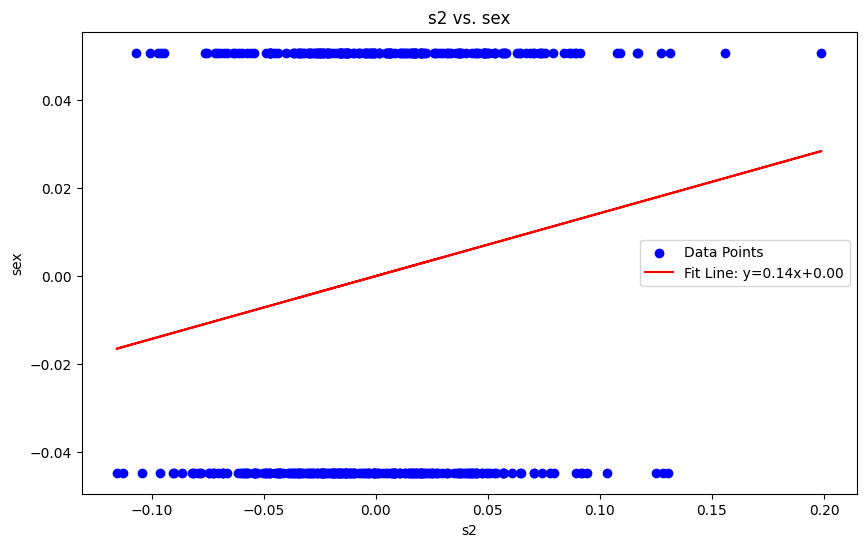

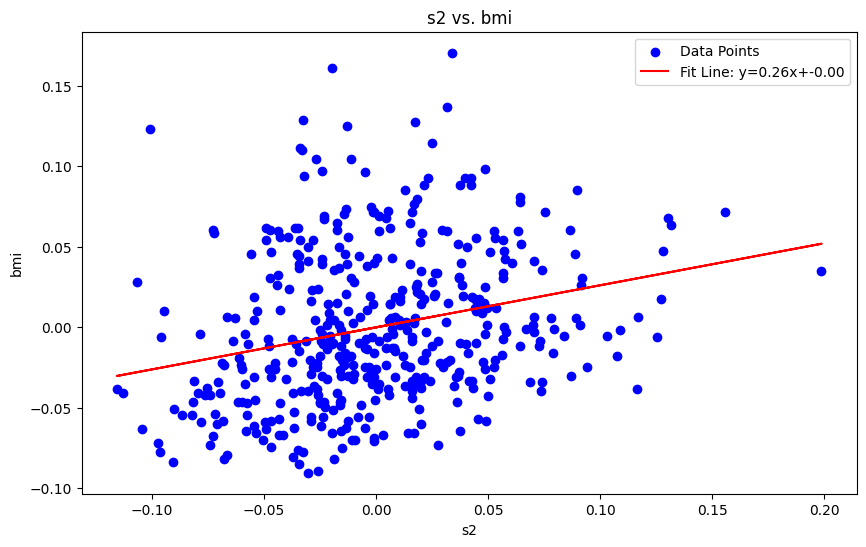

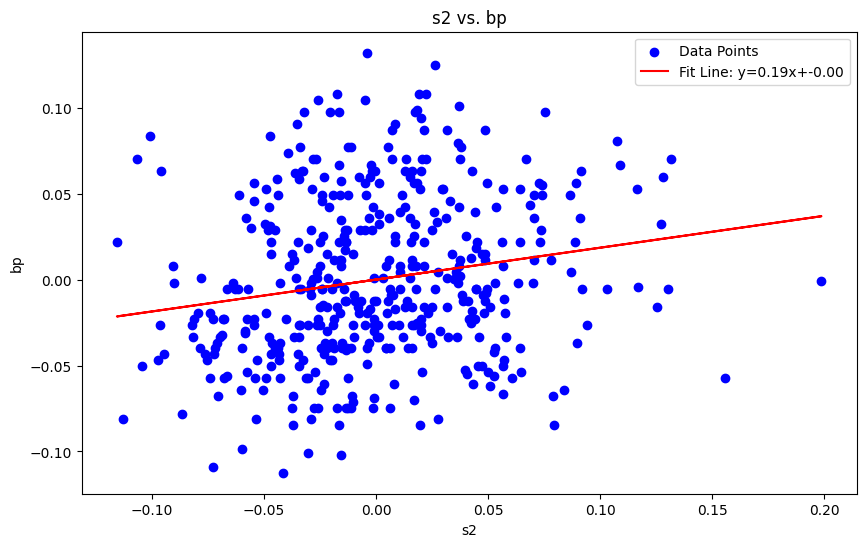

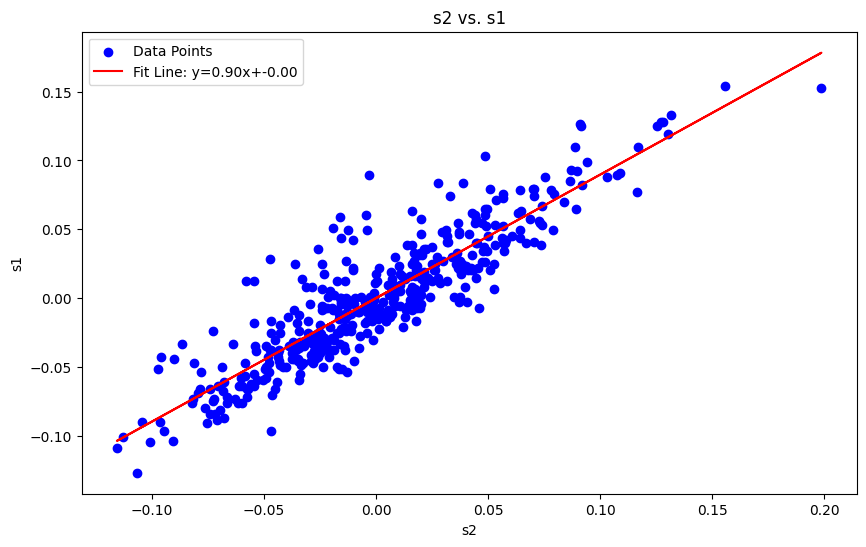

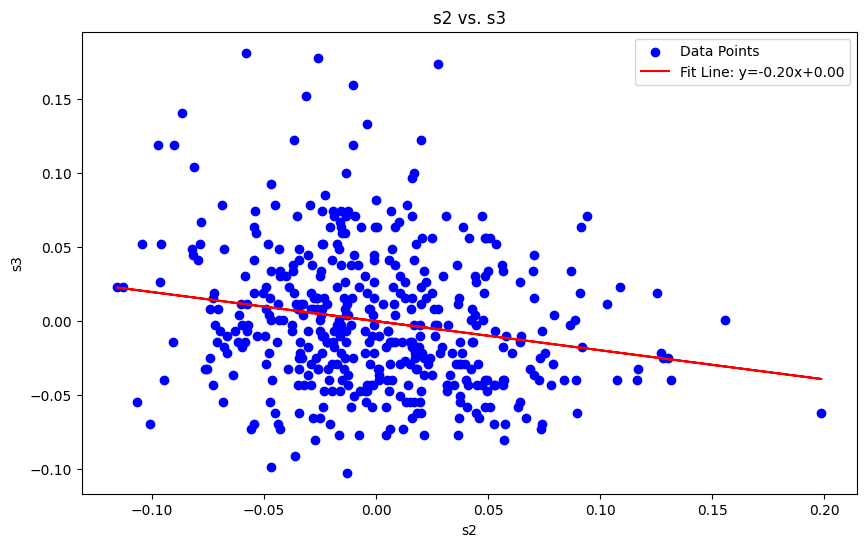

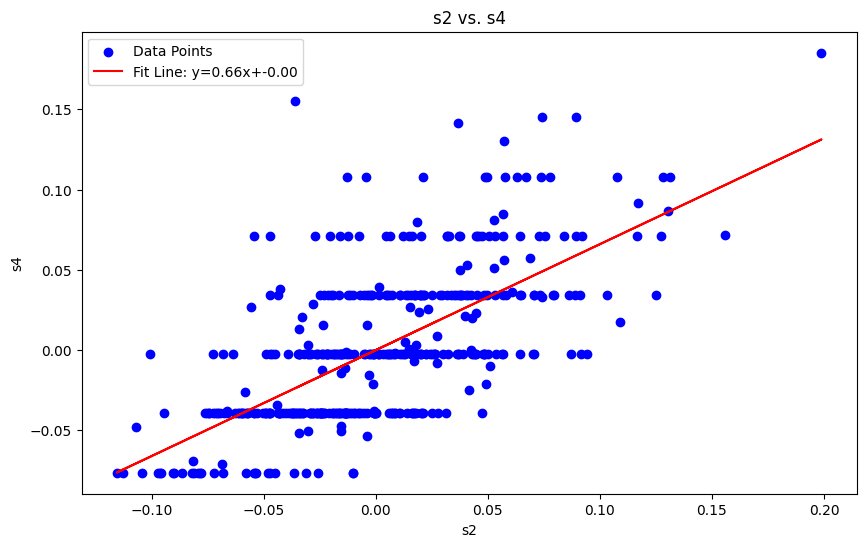

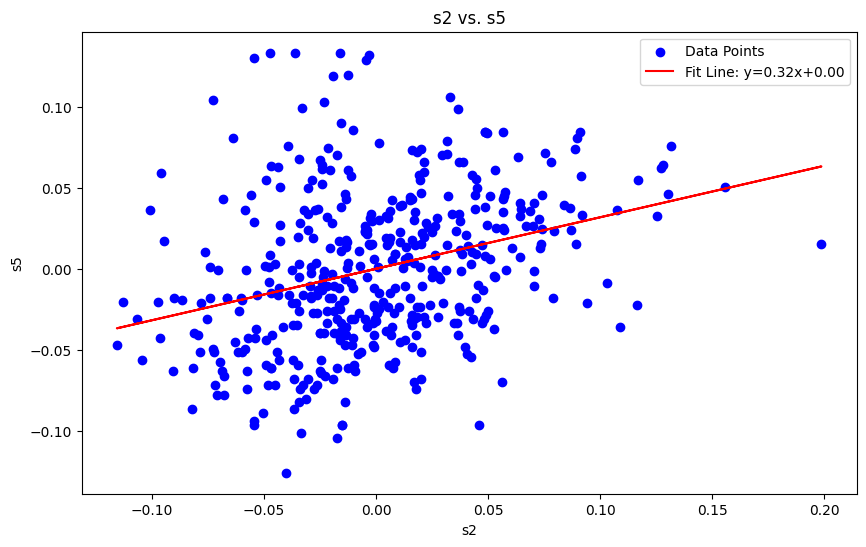

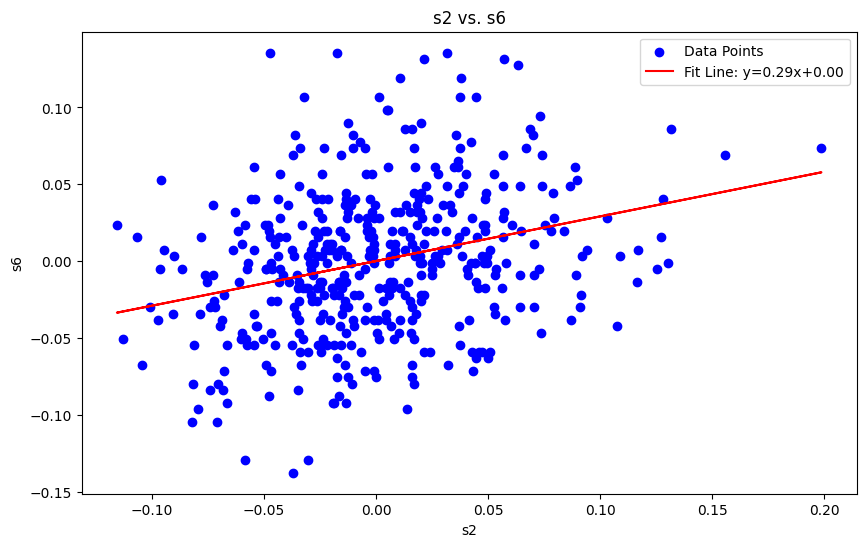

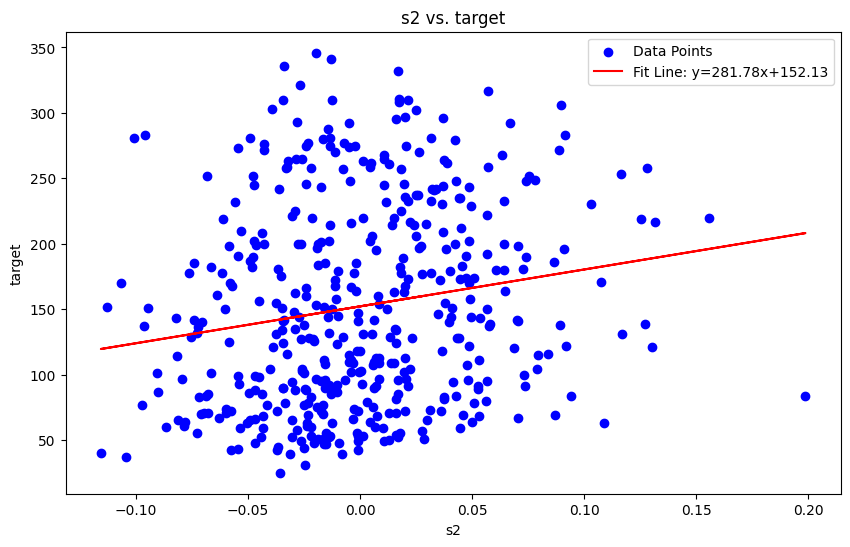

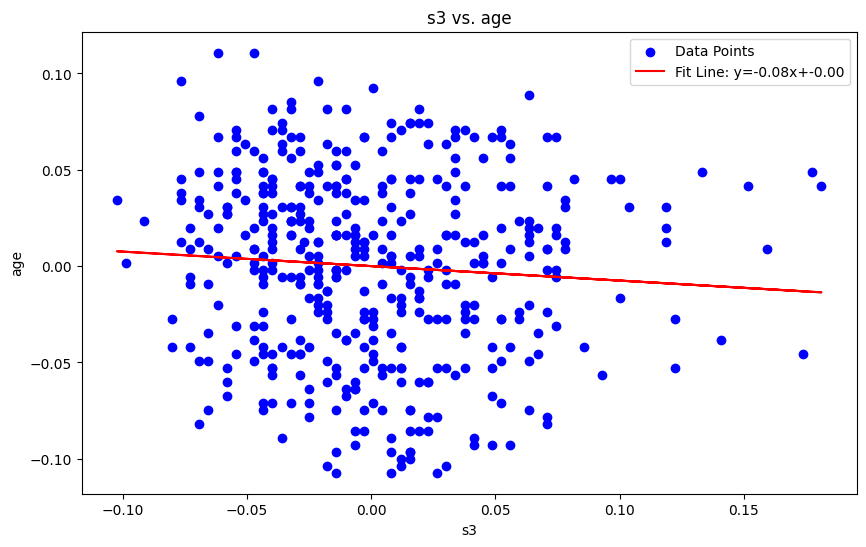

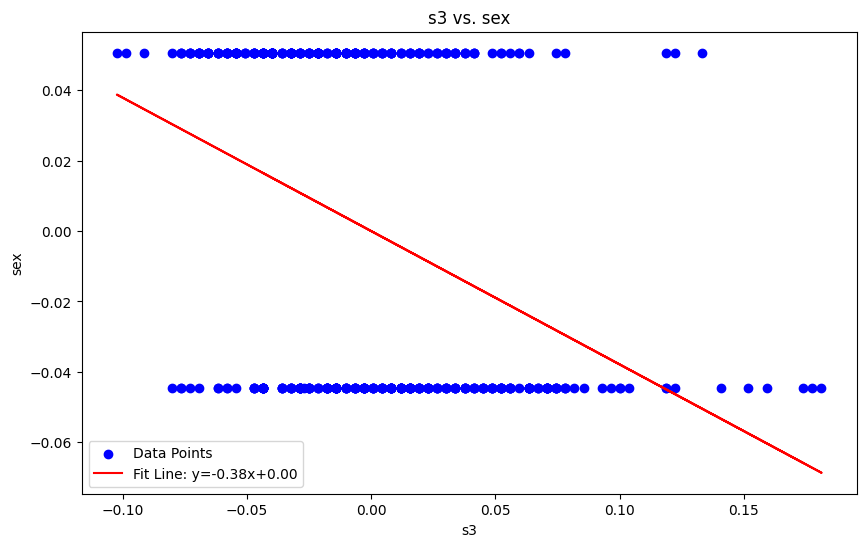

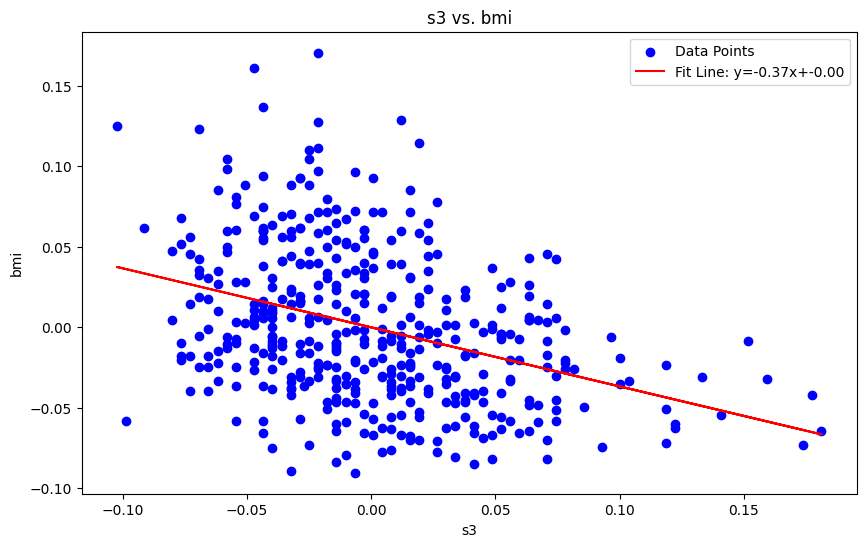

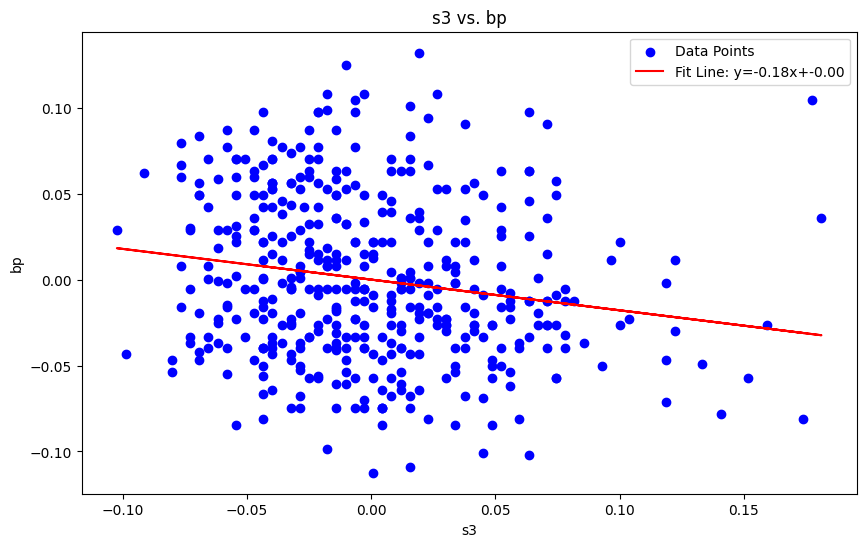

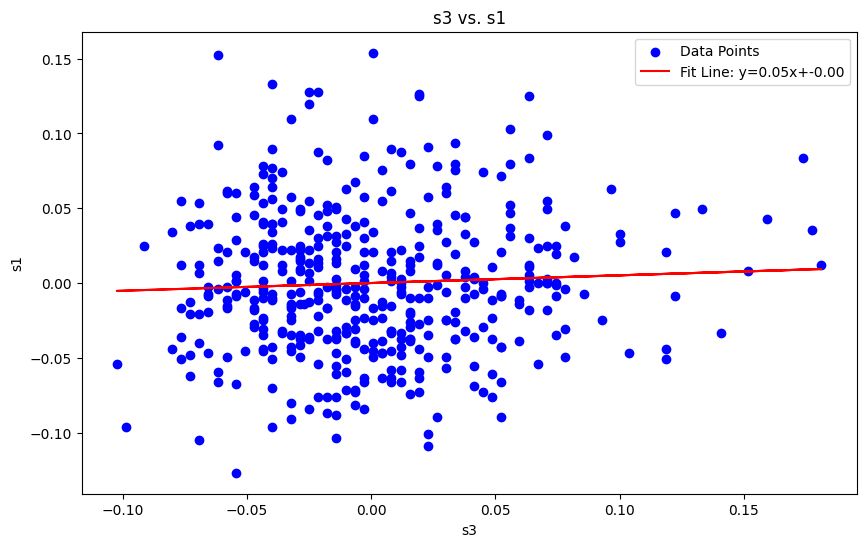

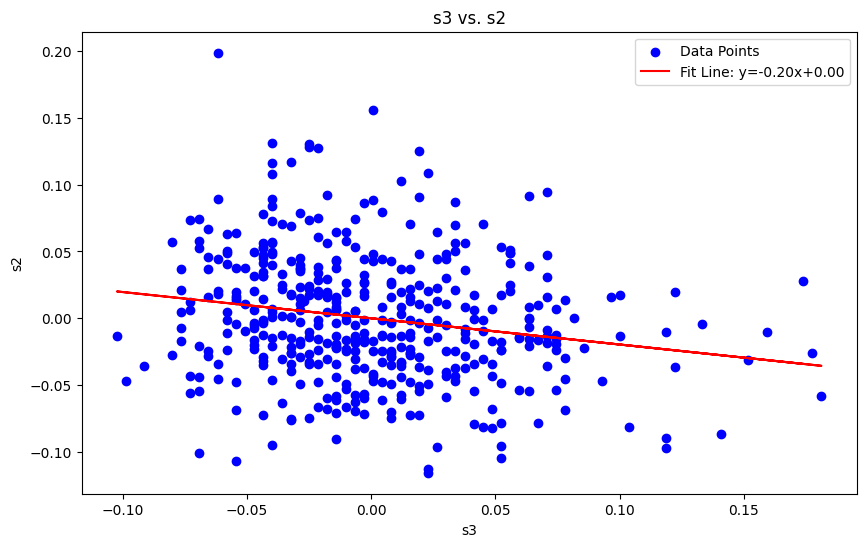

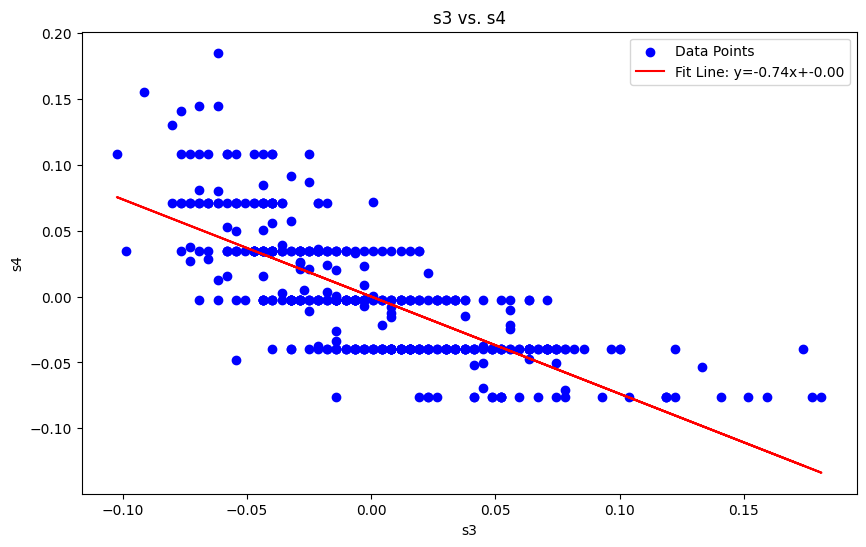

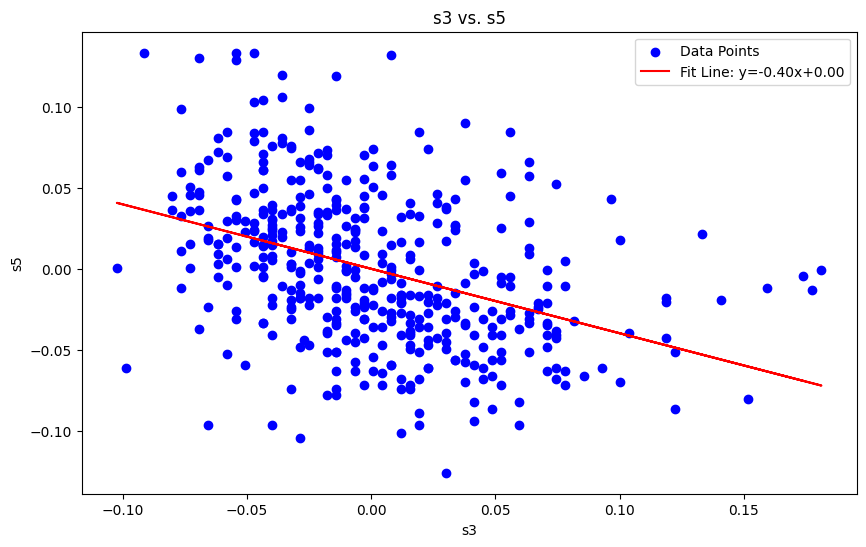

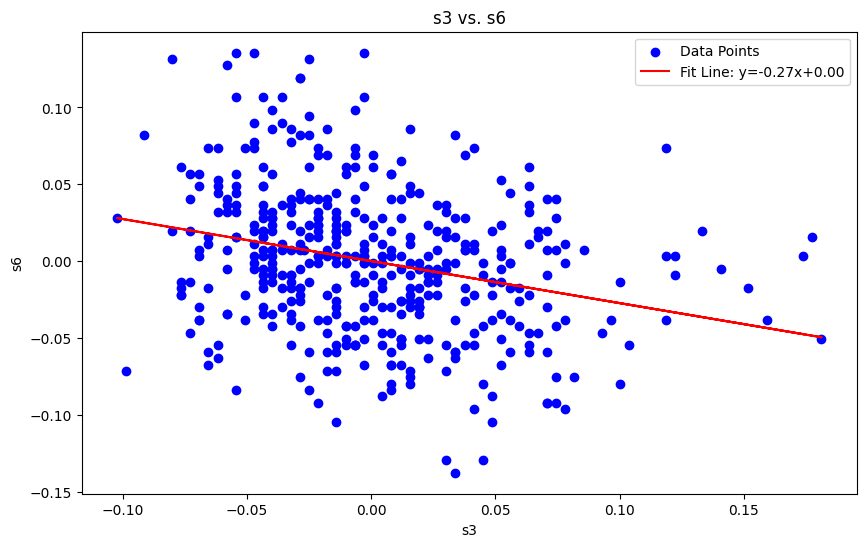

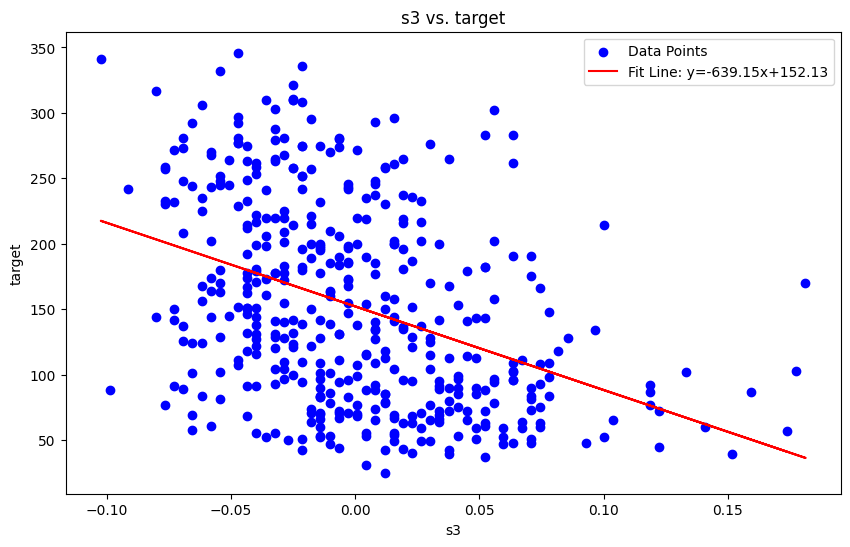

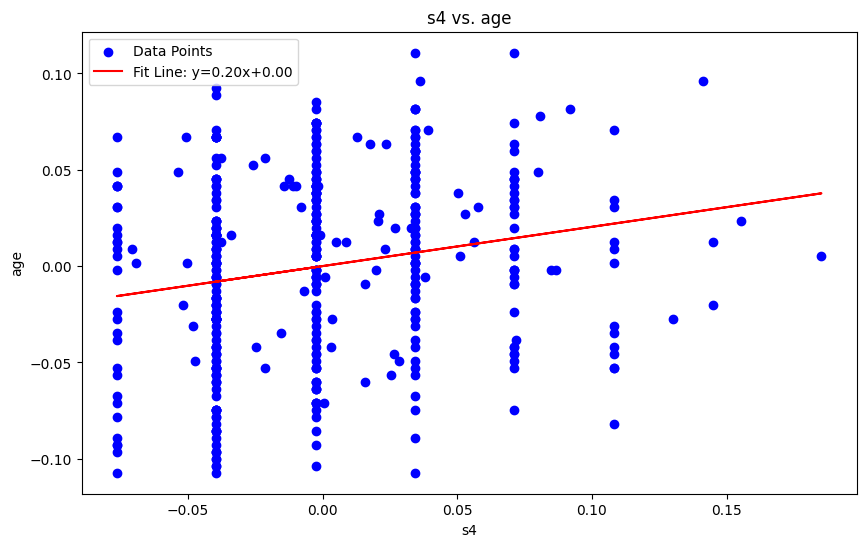

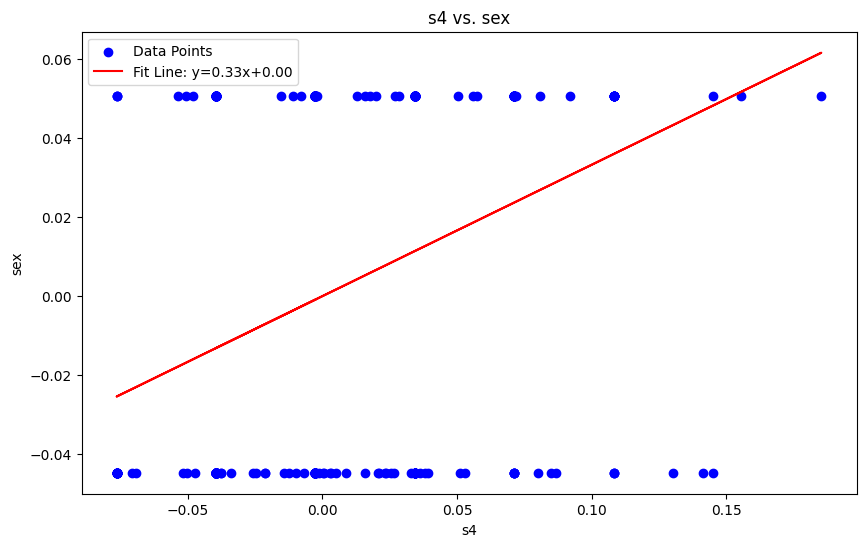

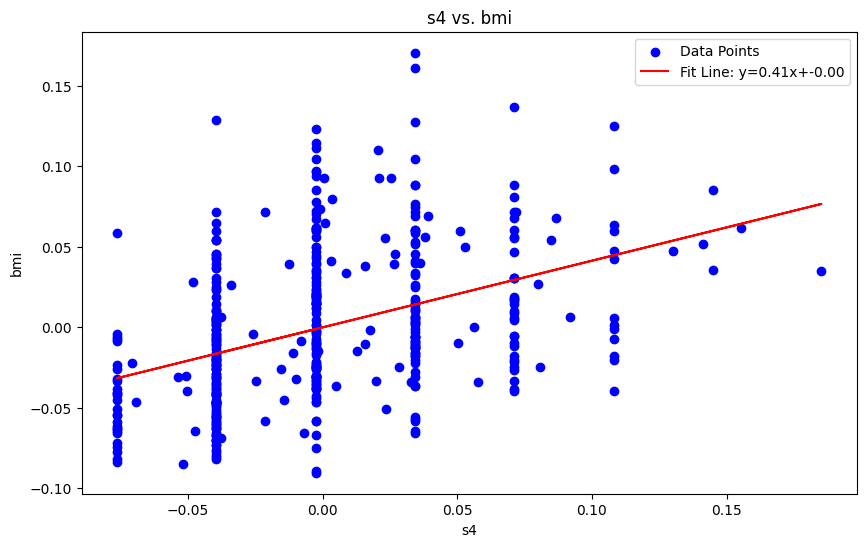

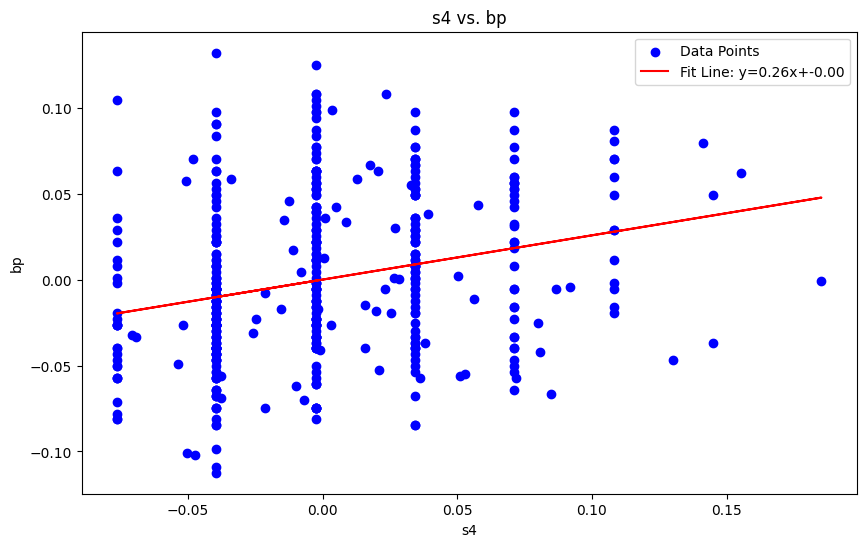

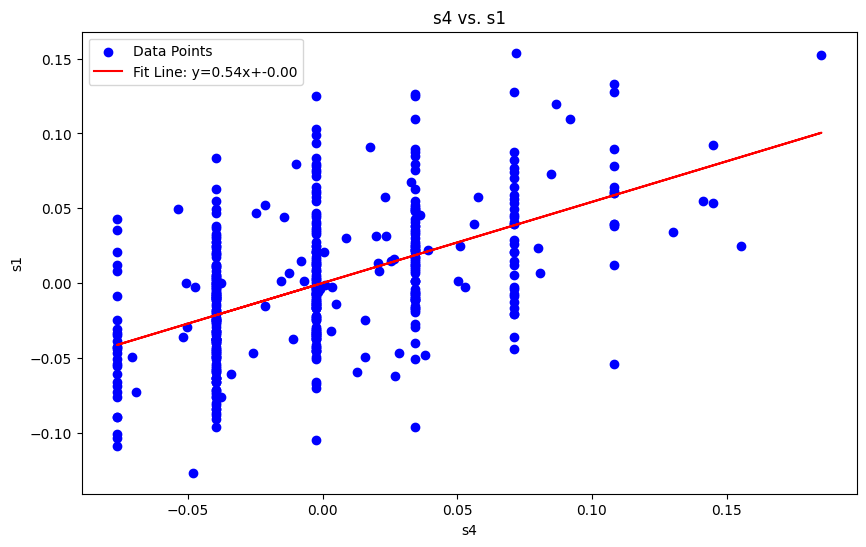

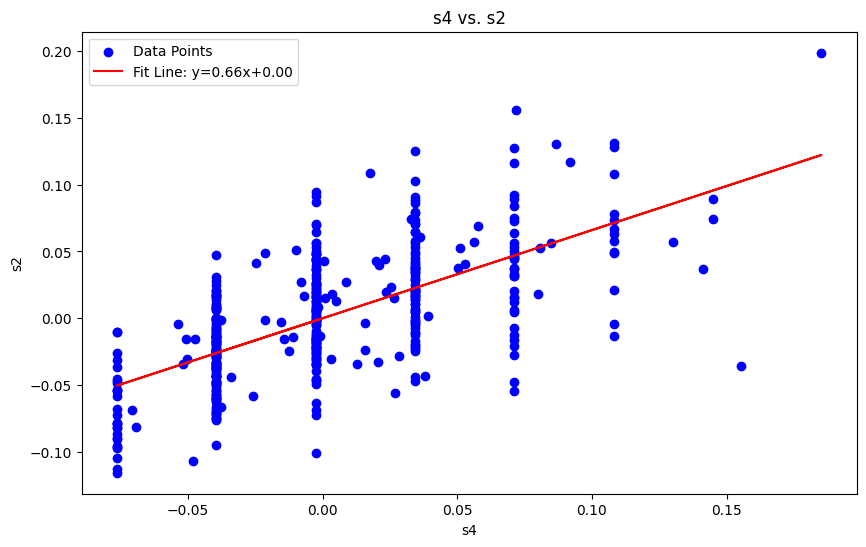

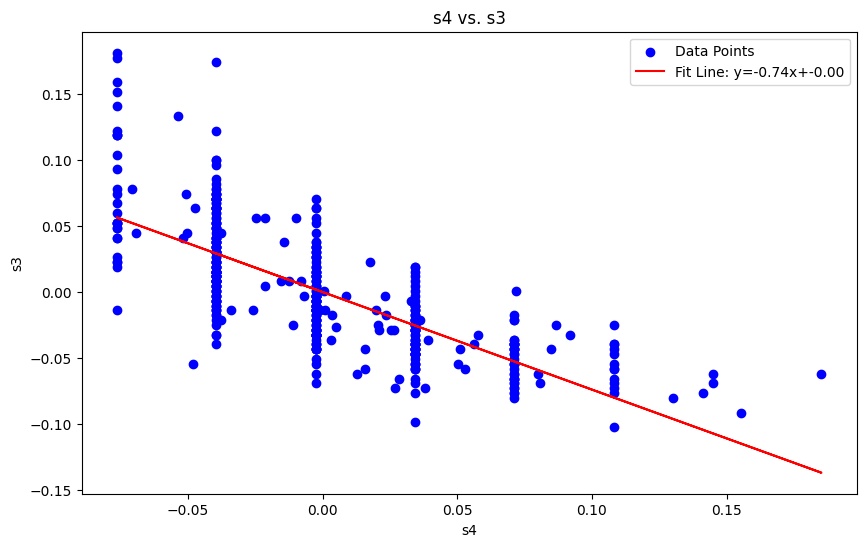

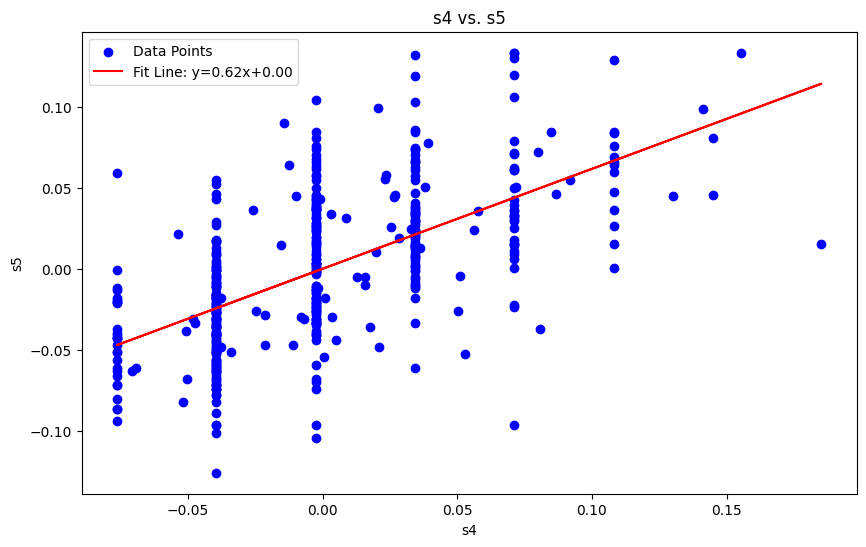

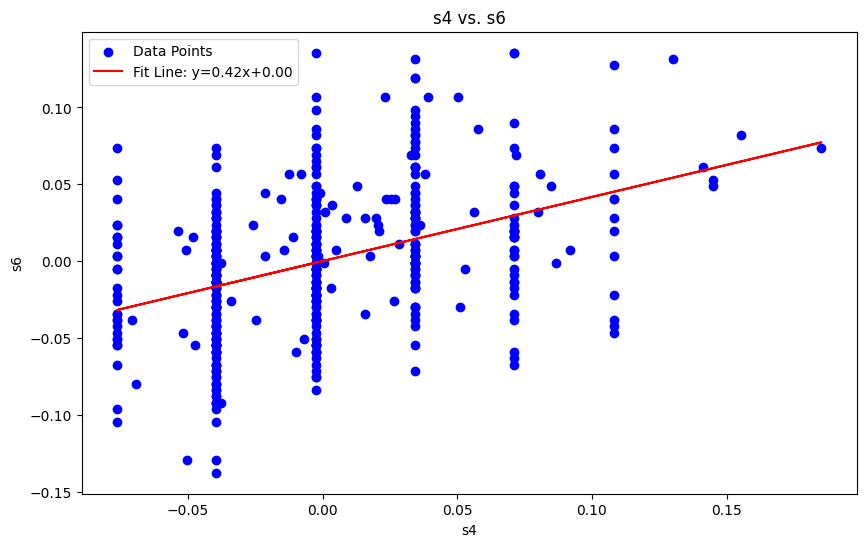

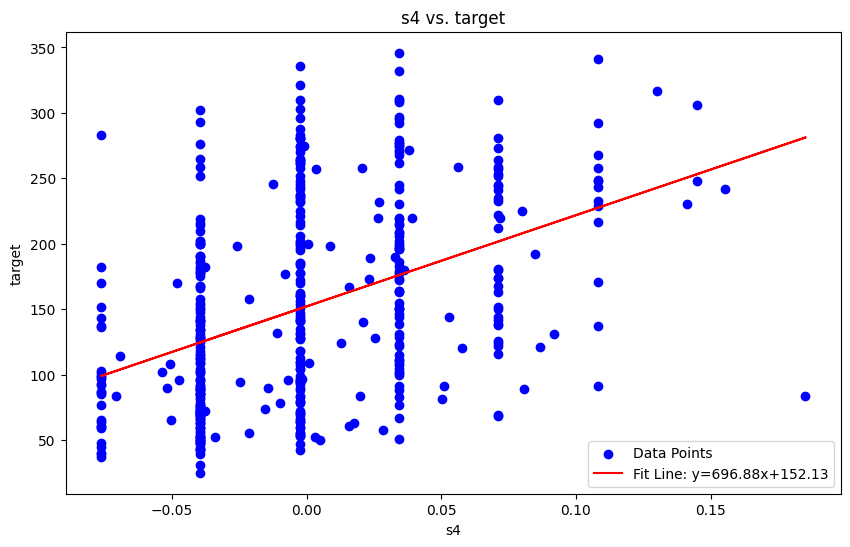

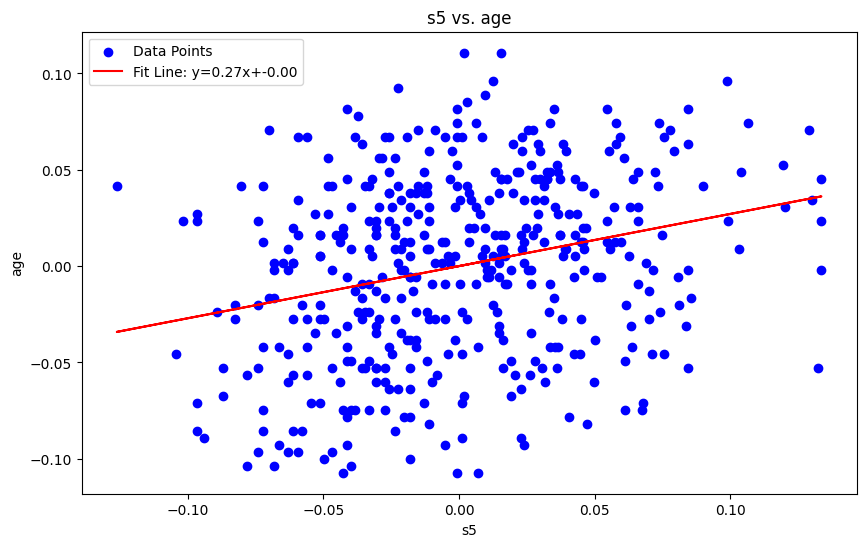

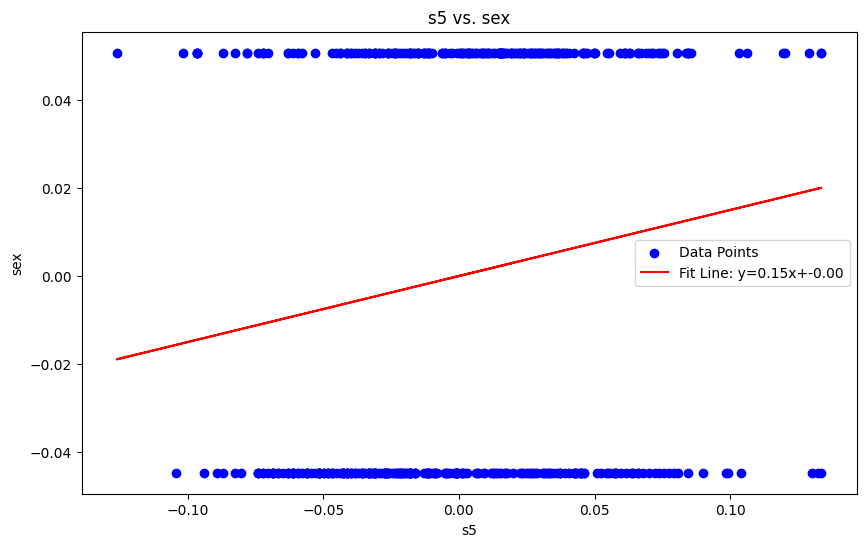

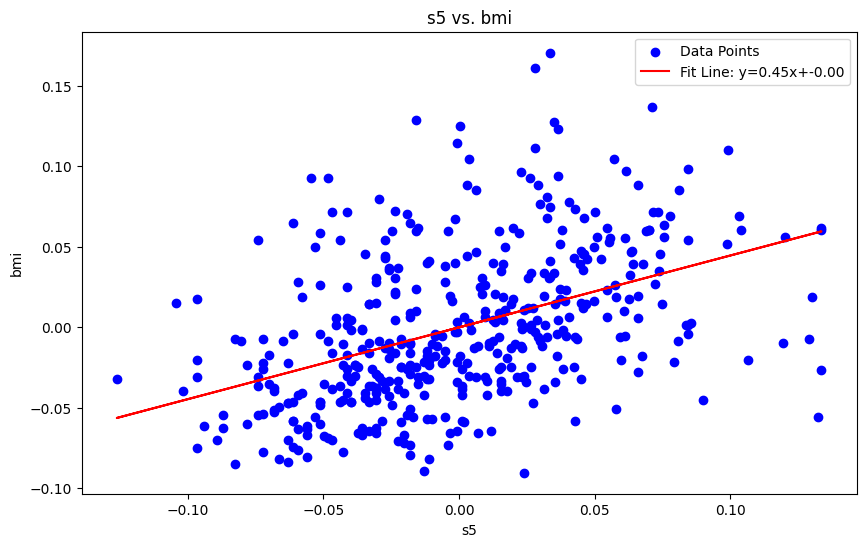

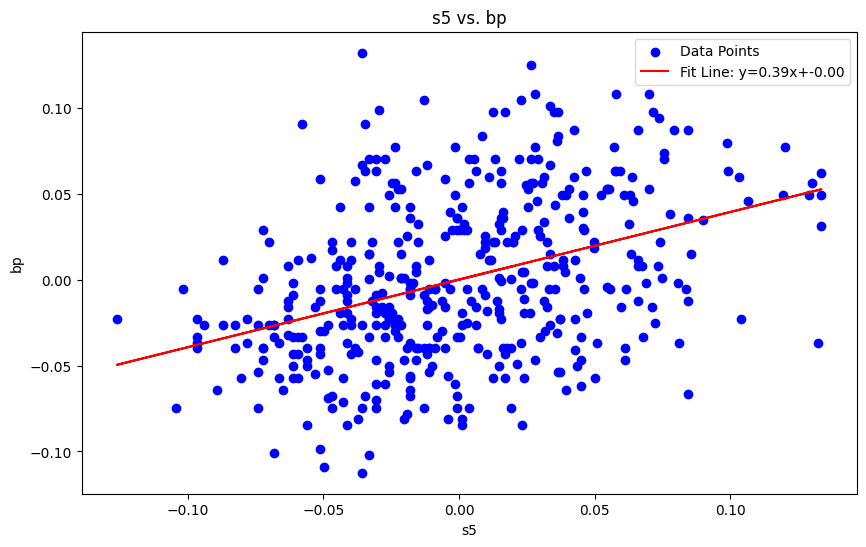

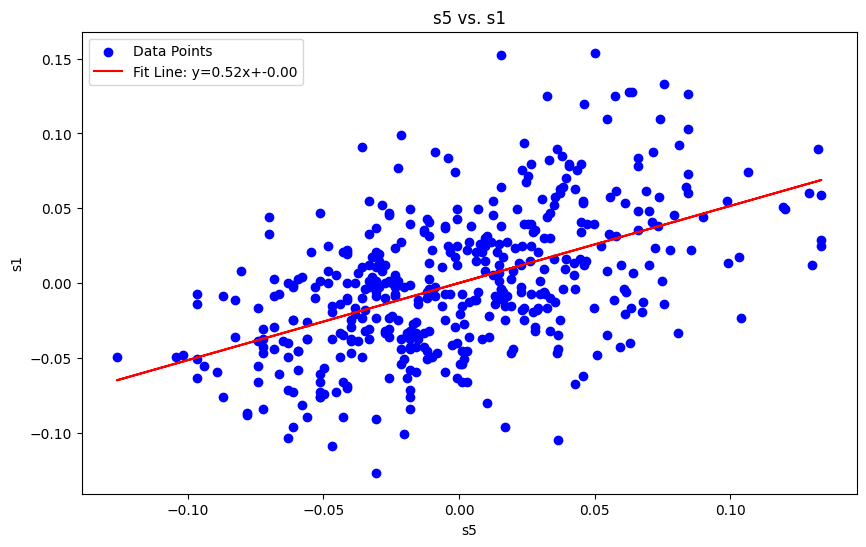

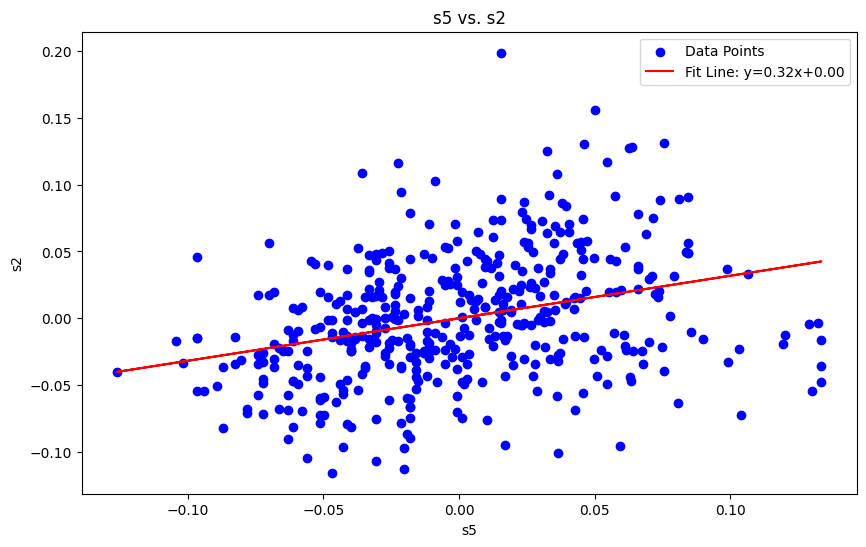

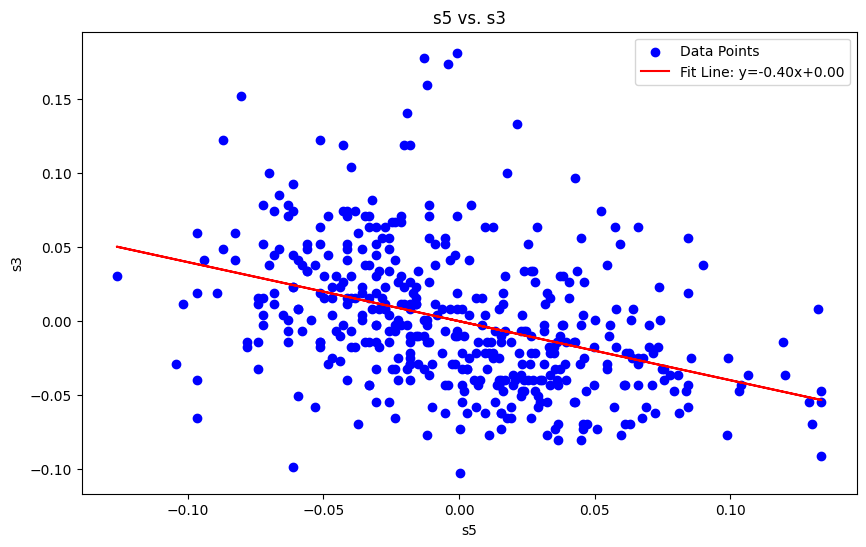

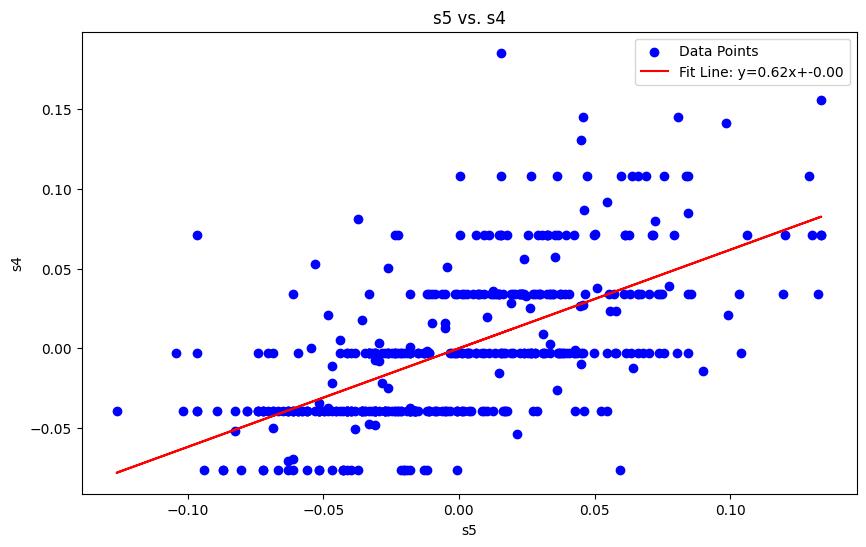

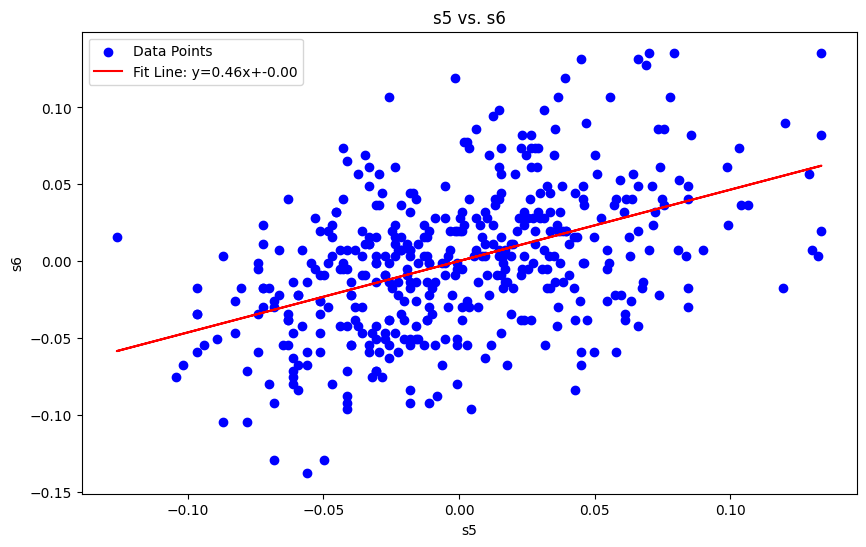

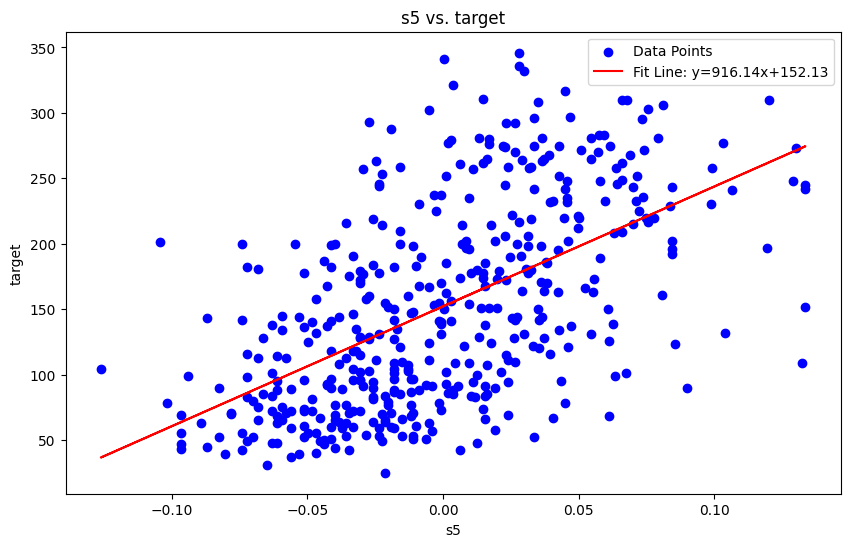

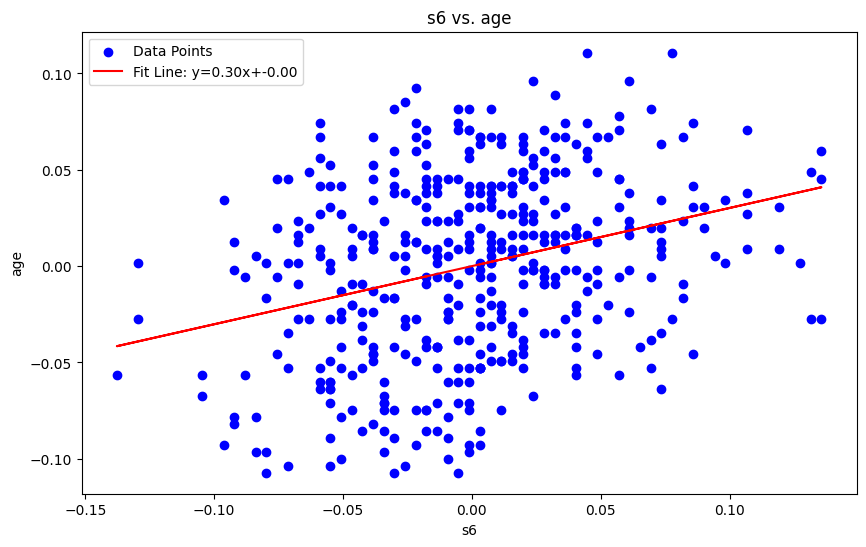

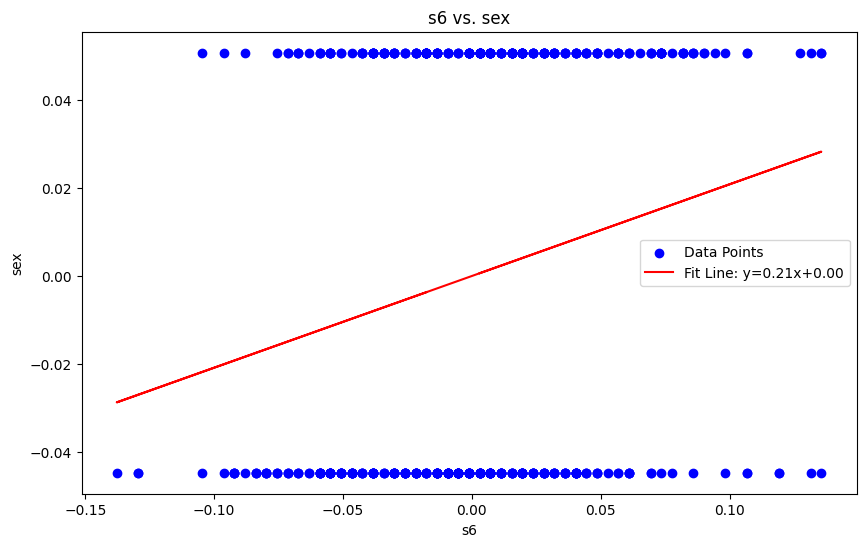

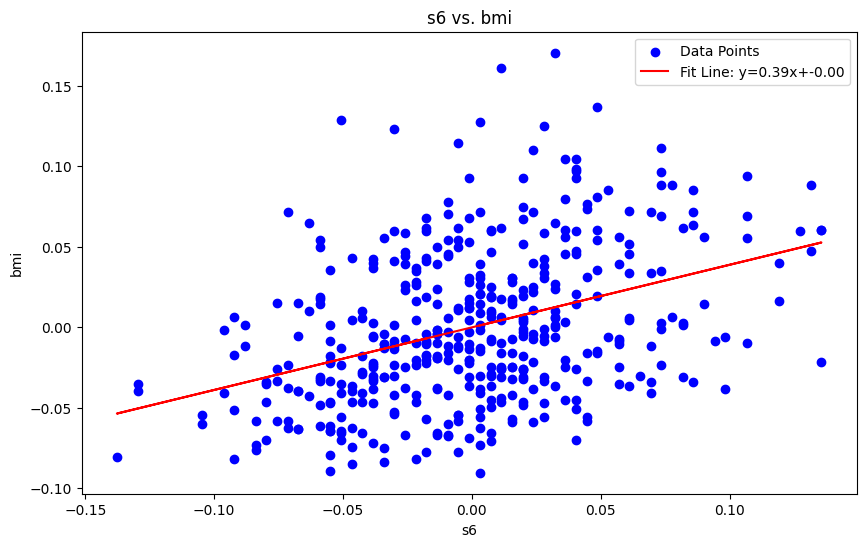

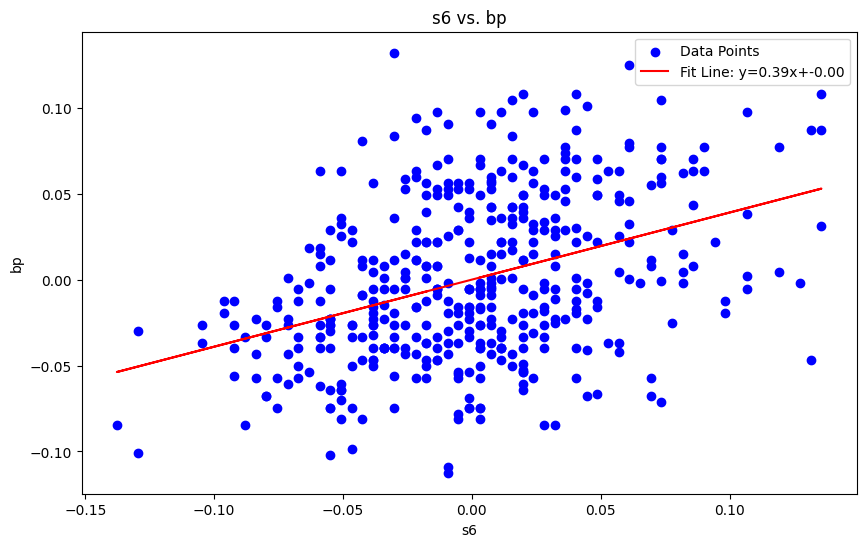

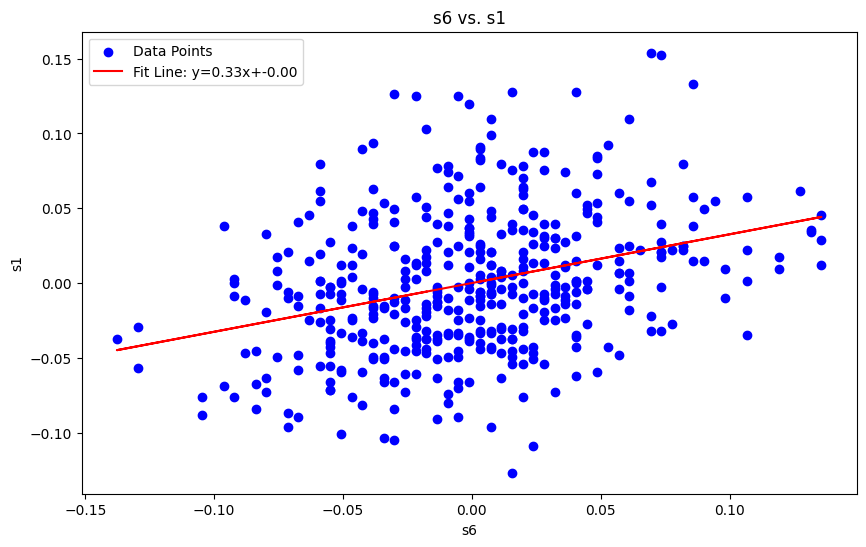

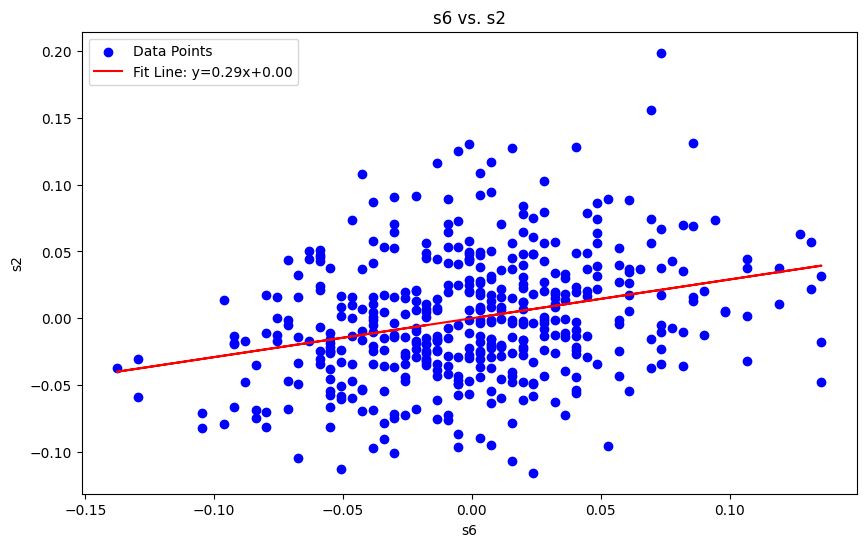

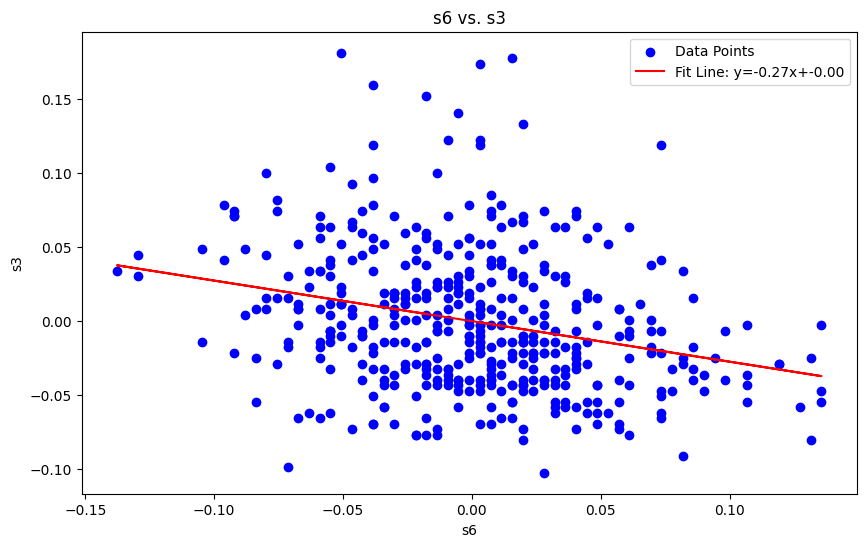

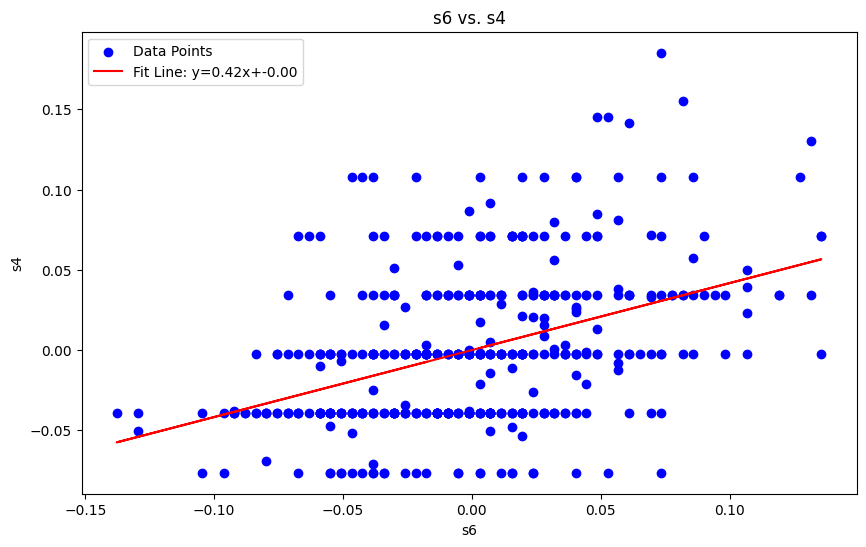

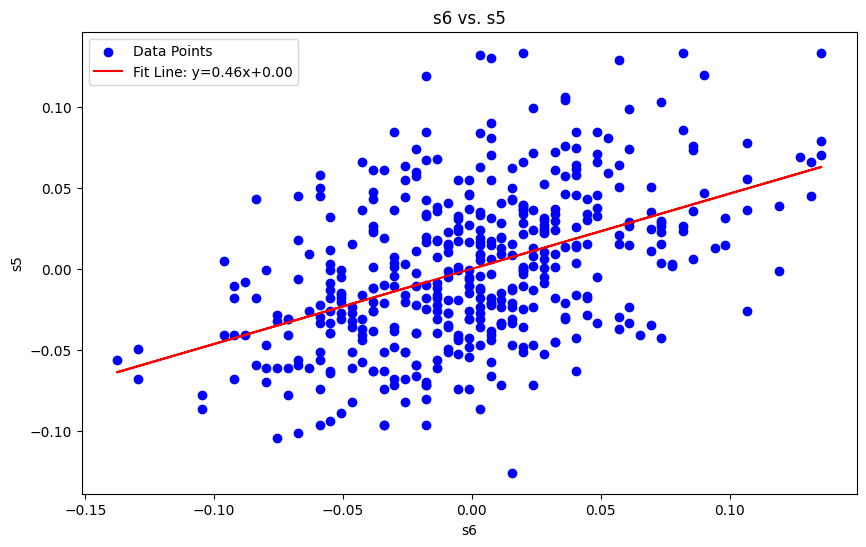

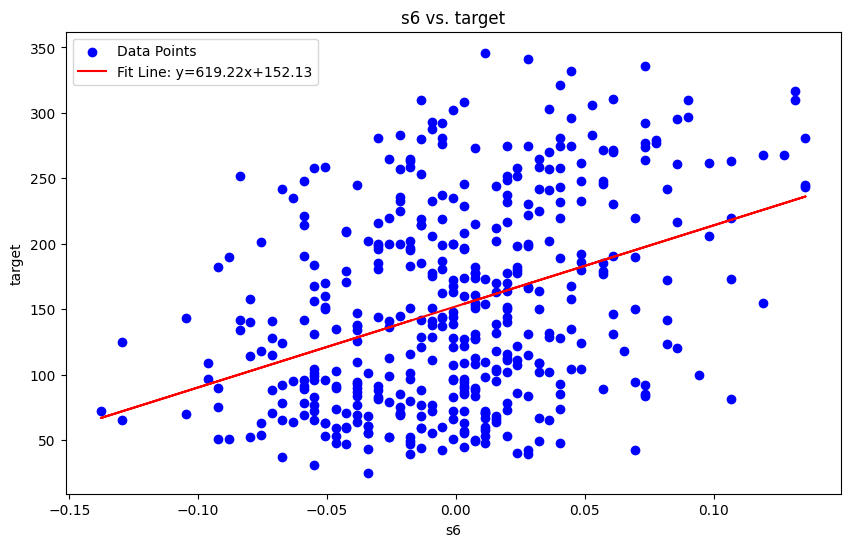

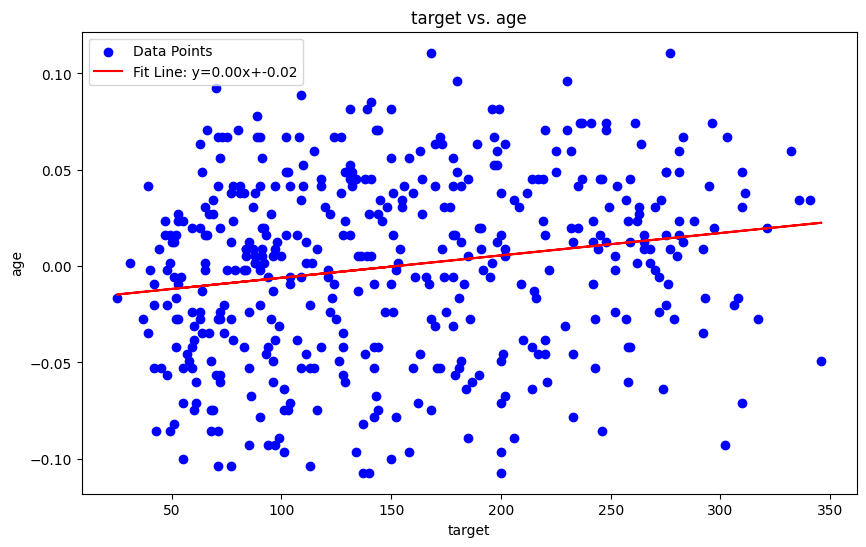

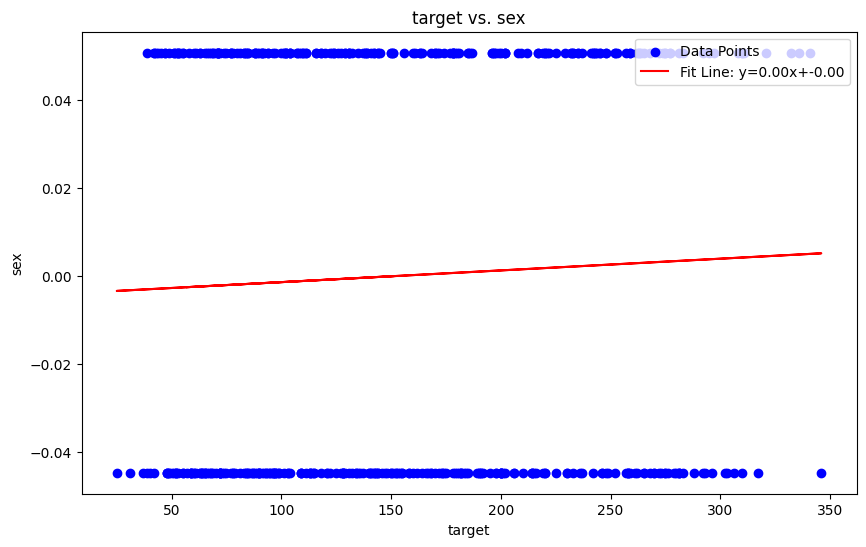

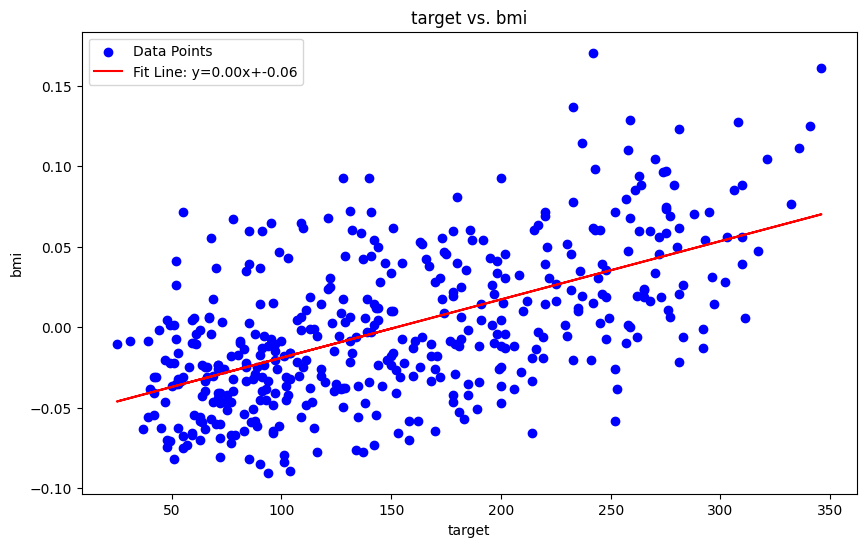

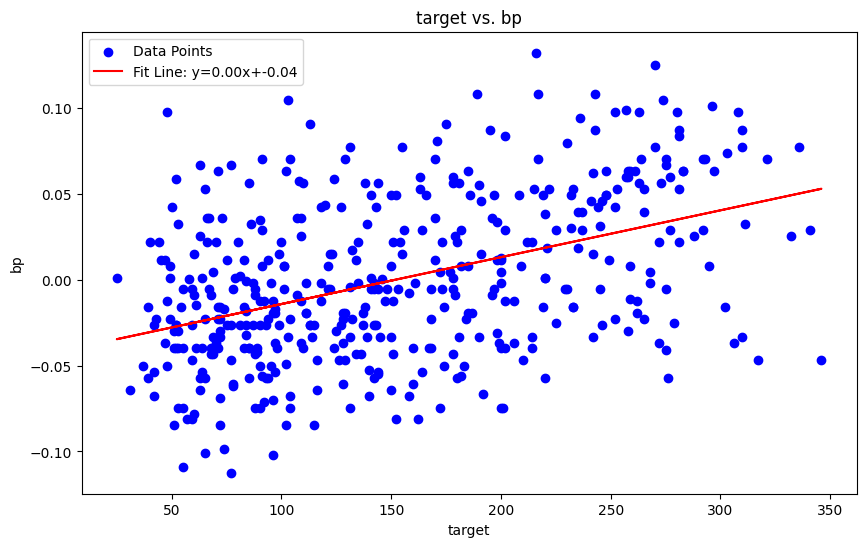

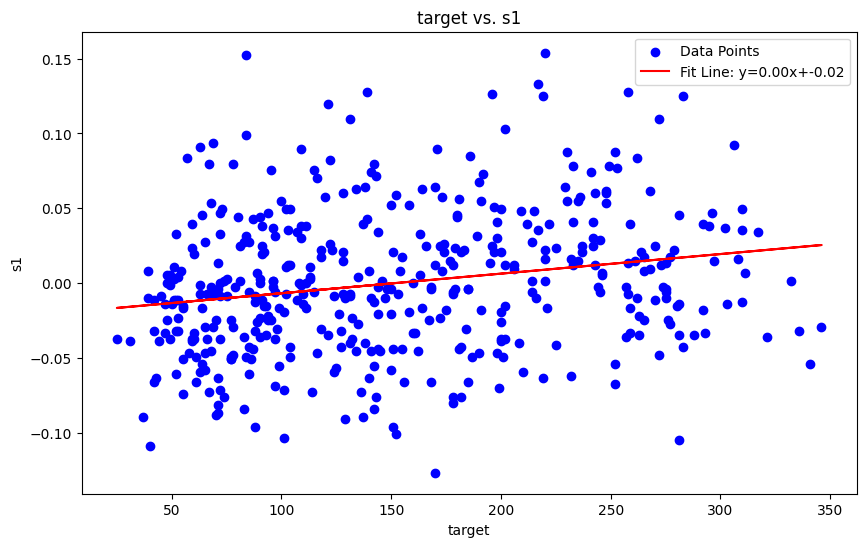

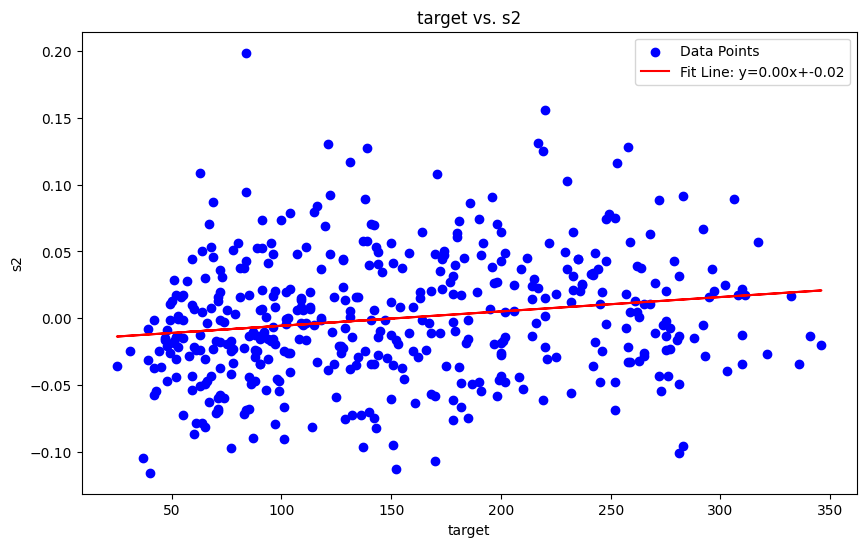

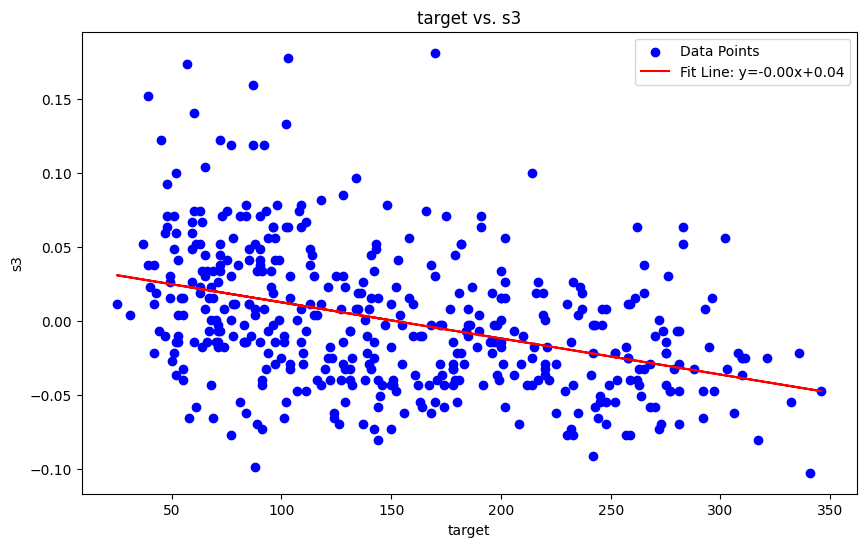

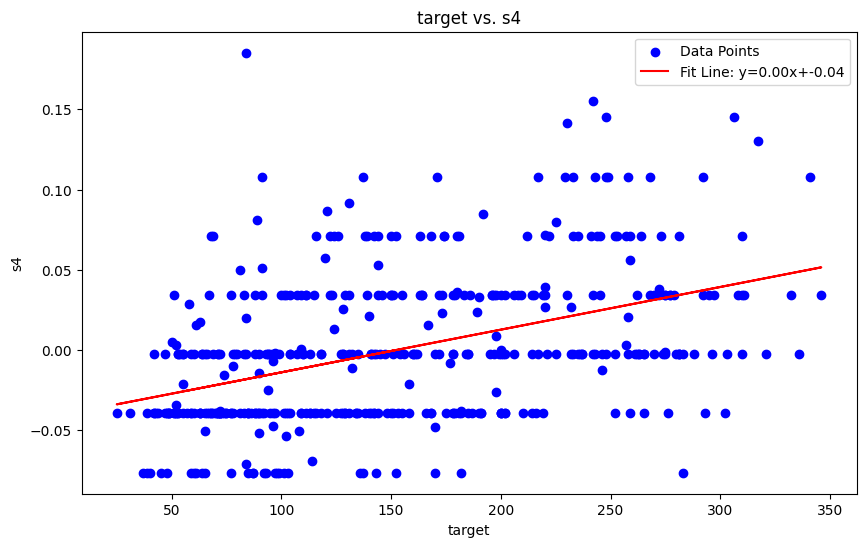

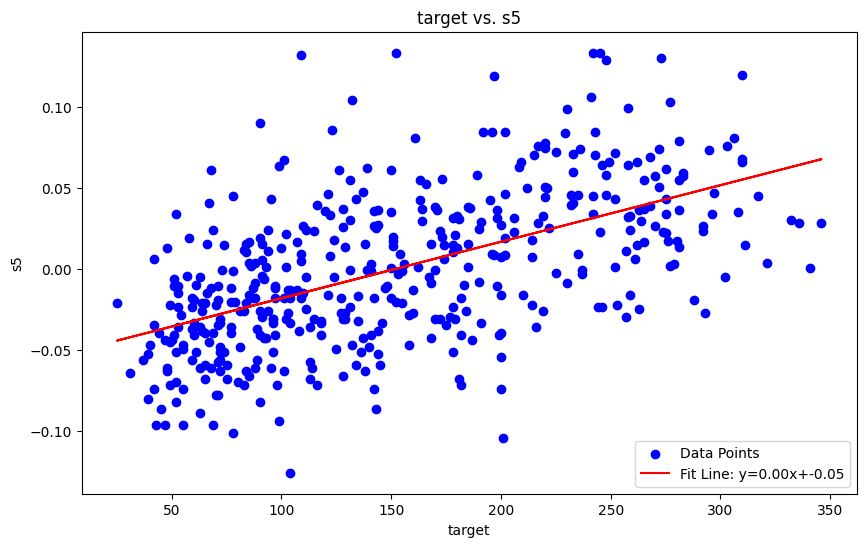

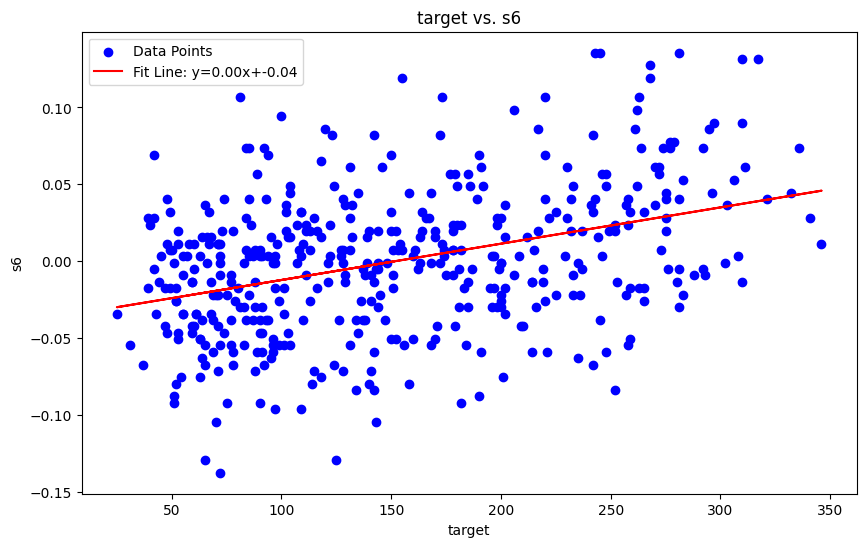

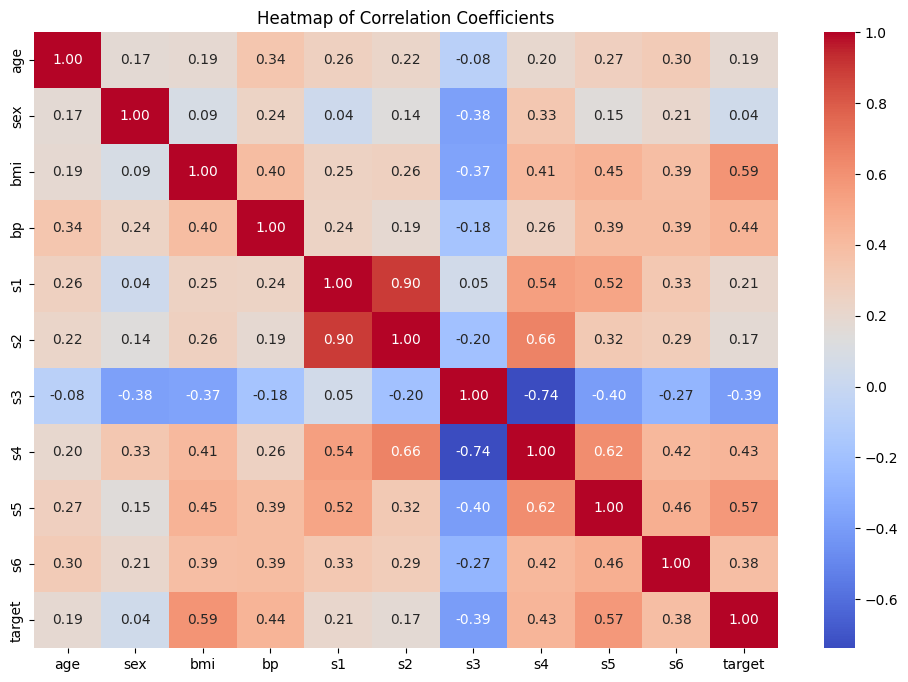

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Tracer les graphiques de dispersion avec ligne de régression
for i in df.columns:
    for j in df.columns:
        if i != j:  # Pour éviter de tracer une variable contre elle-même
            plt.figure(figsize=(10, 6))
            plt.scatter(df[i], df[j], color='blue', label='Data Points')

            # Calculer les coefficients de la régression linéaire
            m, b = np.polyfit(df[i], df[j], 1)

            # Tracer la ligne de régression
            plt.plot(df[i], m * df[i] + b, color='red', label=f'Fit Line: y={m:.2f}x+{b:.2f}')

            plt.xlabel(str(i))
            plt.ylabel(str(j))
            plt.title(f'{i} vs. {j}')
            plt.legend()
            plt.show()

# Générer et afficher la heatmap des coefficients de corrélation
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlation Coefficients')
plt.show()


4. Create a model and compute the accuracy of its predictions. 

In [38]:
m = df.shape[0]
n = df.shape[1] - 1

X = df.drop(columns="target")
y = df['target']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test) # permettera de predire avec la marge le prix inconnu car on aura train le model 

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)

print(f"mean_squared_error : {mse:.2f}") # c'est la valeur absolue d'erreur au dessus et en dessous  par exemple 5000 euro au dessus et en dessous du prix predit (marge d'erreur)

mean_squared_error : 2203.42


5. Play with other datasets such as `boston` from scikit-learn, or find datasets online such as [this one](https://www.kaggle.com/dmvreddy91/usahousing) or [this one](https://www.kaggle.com/hellbuoy/car-price-prediction). Careful, not all the datasets are appropriate for regression, so make sure to specify that in your search.